## 2. Análisis Estadístico de datos

Importación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

import pingouin as pg
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

from matplotlib.colors import ListedColormap

import joblib

Lectura de datos

In [2]:
df = pd.read_csv('../datos_depurados/dataset_depurado.csv')

Exploración de datos

In [3]:
df.shape

(456233, 61)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456233 entries, 0 to 456232
Data columns (total 61 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   var_rpta_alt                     456233 non-null  int64  
 1   banca                            456233 non-null  object 
 2   segmento_x                       456233 non-null  object 
 3   producto_x                       456233 non-null  object 
 4   aplicativo_x                     456233 non-null  object 
 5   min_mora                         456233 non-null  int64  
 6   max_mora                         456233 non-null  int64  
 7   dias_mora_fin                    456233 non-null  int64  
 8   rango_mora                       456233 non-null  object 
 9   vlr_obligacion                   456233 non-null  float64
 10  vlr_vencido                      456233 non-null  float64
 11  saldo_capital                    456233 non-null  float64
 12  en

In [5]:
df.describe()

/home/sergioq2/AI/Bancolombia/banc_venv/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,var_rpta_alt,min_mora,max_mora,dias_mora_fin,vlr_obligacion,vlr_vencido,saldo_capital,endeudamiento,cant_alter_posibles,cant_gestiones,...,egresos_mes,tot_patrimonio,lote,prob_propension,prob_alrt_temprana,prob_auto_cura,valor_cuota_mes_y,pago_total,porc_pago,antiguedad
count,456233.000000,456233.000000,456233.000000,456233.000000,4.562330e+05,4.562330e+05,4.562330e+05,4.562330e+05,456233.000000,456233.000000,...,4.562330e+05,4.562330e+05,456233.000000,456233.000000,456233.000000,456233.000000,4.562330e+05,4.562330e+05,456233.0,456233.000000
mean,0.480450,26.836246,36.791411,37.244879,1.168538e+07,1.038192e+06,1.082298e+07,3.539152e+07,1.810242,32.416116,...,4.660784e+08,1.649973e+08,1.683125,0.513145,0.613678,0.274966,1.190760e+06,1.190197e+06,inf,3712.382305
std,0.499618,25.835780,34.092350,35.205280,2.501148e+07,2.815538e+06,2.366011e+07,5.833289e+07,0.864049,27.290691,...,4.559475e+10,2.125065e+10,0.742873,0.243055,0.124202,0.150221,3.265906e+06,9.509268e+06,NaN,2916.531100
min,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,1.000000,0.000000,...,0.000000e+00,0.000000e+00,1.000000,0.044572,0.043320,0.047282,0.000000e+00,0.000000e+00,0.0,4.000000
25%,0.000000,4.000000,0.000000,0.000000,1.582029e+06,1.902260e+05,1.419807e+06,5.119453e+06,1.000000,12.000000,...,1.000000e+05,4.200000e+06,1.000000,0.297490,0.554805,0.169535,1.834970e+05,0.000000e+00,0.0,1757.000000
50%,0.000000,17.000000,29.000000,29.000000,4.177424e+06,4.550230e+05,3.783116e+06,1.484453e+07,2.000000,28.000000,...,4.000000e+05,2.650100e+07,2.000000,0.537794,0.619546,0.230766,4.785300e+05,0.000000e+00,0.0,2964.000000
75%,1.000000,46.000000,60.000000,60.000000,1.081957e+07,1.033443e+06,9.896342e+06,4.216423e+07,3.000000,44.000000,...,8.000000e+05,8.776400e+07,2.000000,0.734346,0.705590,0.327318,1.157200e+06,2.989410e+05,100.0,4646.000000
max,1.000000,90.000000,106.000000,609.000000,1.589994e+09,5.023519e+08,1.552838e+09,1.879460e+09,12.000000,1030.000000,...,6.000000e+12,9.799656e+12,3.000000,0.957395,0.929517,0.942418,4.594683e+08,2.415000e+09,inf,40959.000000


## Análisis Estadístico de las variables cuantitativas

In [6]:
int_vars = df.select_dtypes(include=['int64']).columns
int_vars

Index(['var_rpta_alt', 'min_mora', 'max_mora', 'dias_mora_fin',
       'cant_alter_posibles', 'promesas_cumplidas',
       'cant_promesas_cumplidas_binario', 'lote', 'antiguedad'],
      dtype='object')

In [7]:
df['cant_promesas_cumplidas_binario'] = df['cant_promesas_cumplidas_binario'].astype(str)

In [8]:
df.rename(columns={'var_rpta_alt': 'y'}, inplace=True)

Clase para detección, análisis, y limpieza de outliers

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class OutlierDetector:
    def __init__(self, df, column):
        self.df = df
        self.column = column

    def detect_errors(self):
        errors = self.df[(self.df[self.column].isnull()) | (self.df[self.column] <= 0)]
        return errors

    def replace_errors(self):
        self.df[self.column] = np.where(self.df[self.column] < 0, np.nan, self.df[self.column])
        self.df[self.column] = self.df[self.column].fillna(self.df[self.column].mean())
        return self.df

    def detect_outliers(self):
        # Outliers are values outside the 2nd and 98th percentiles
        q1 = self.df[self.column].quantile(0.02)
        q2 = self.df[self.column].quantile(0.98)
        outliers = self.df[(self.df[self.column] < q1) | (self.df[self.column] > q2)]
        return outliers

    def visualize_outliers(self):
        plt.figure(figsize=(10, 6))
        sns.set(style="whitegrid")
        sns.boxplot(x=self.df[self.column])
        plt.title(f"Boxplot of {self.column}")
        plt.show()

    def replace_outliers(self):
        # Replace outliers with the 2nd and 98th percentiles as limits
        q1 = self.df[self.column].quantile(0.02)
        q2 = self.df[self.column].quantile(0.98)
        self.df[self.column] = np.where(self.df[self.column] < q1, q1, self.df[self.column])
        self.df[self.column] = np.where(self.df[self.column] > q2, q2, self.df[self.column])
        return self.df


Aplicación a la variable min mora

In [10]:
outlier_detector_minmora = OutlierDetector(df, 'min_mora')

In [11]:
outlier_detector_minmora.detect_errors()

,y,banca,segmento_x,producto_x,aplicativo_x,min_mora,max_mora,dias_mora_fin,rango_mora,vlr_obligacion,...,prob_auto_cura,producto_y,aplicativo_y,segmento_y,valor_cuota_mes_y,pago_total,porc_pago,marca_pago_y,ajustes_banco,antiguedad


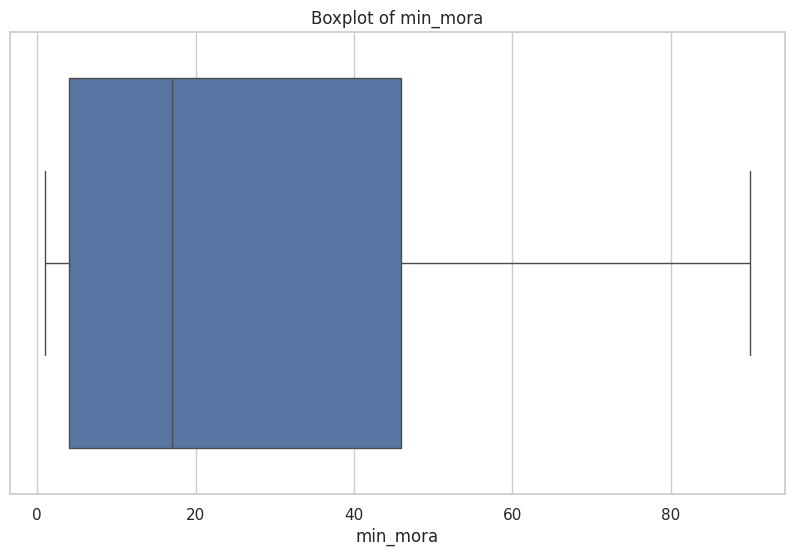

In [12]:
outlier_detector_minmora.visualize_outliers()

In [13]:
outlier_detector_minmora.replace_outliers()

,y,banca,segmento_x,producto_x,aplicativo_x,min_mora,max_mora,dias_mora_fin,rango_mora,vlr_obligacion,...,prob_auto_cura,producto_y,aplicativo_y,segmento_y,valor_cuota_mes_y,pago_total,porc_pago,marca_pago_y,ajustes_banco,antiguedad
0,1,Banca Personas,Personal,TARJETA DE CREDITO,V,46.0,71,71,b.31-90,6056996.0,...,0.217264,TARJETA DE CREDITO,V,PERSONAL,0.0,0.0,0.0,CANCELADO,NO,1281
1,1,Banca Personas,Personal,LIBRE INVERSION,L,16.0,0,0,a.1-30,9877235.0,...,0.268250,LIBRE INVERSION,L,PERSONAL,443837.0,0.0,0.0,FACTURACION_MES_SGTE,NO,1951
2,1,Banca Personas,Personal,LIBRE INVERSION,L,36.0,65,65,b.31-90,79487960.0,...,0.143200,LIBRE INVERSION,L,PERSONAL,5122226.0,0.0,0.0,NO_PAGO,NO,13293
3,1,Banca Personas,Personal plus,ROTATIVOS,L,18.0,32,32,a.1-30,822626.0,...,0.272365,ROTATIVOS,L,PERSONAL PLUS,43492.0,0.0,0.0,CANCELADO,NO,14185
4,1,Independientes,Micropyme,CARTERA ORDINARIA,L,15.0,0,0,a.1-30,37271605.0,...,0.468850,CARTERA ORDINARIA,L,MICROPYME,5214940.0,36506471.0,700.0,PAGO_MENOS,NO,5606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456228,0,Banca Personas,Personal plus,TARJETA DE CREDITO,K,29.0,57,57,a.1-30,5986670.0,...,0.601680,TARJETA DE CREDITO,K,PERSONAL PLUS,4713882.0,0.0,0.0,NO_PAGO,NO,2687
456229,0,Independientes,Micropyme,TARJETA DE CREDITO,V,5.0,26,26,a.1-30,2812265.0,...,0.660651,TARJETA DE CREDITO,V,MICROPYME,1646612.0,1650000.0,100.0,CANCELADO,NO,3177
456230,0,Independientes,Micropyme,TARJETA DE CREDITO,V,2.0,29,29,a.1-30,6776287.0,...,0.704581,TARJETA DE CREDITO,V,MICROPYME,951816.0,0.0,0.0,NO_PAGO,NO,3477
456231,1,Independientes,Micropyme,TARJETA DE CREDITO,M,15.0,0,0,a.1-30,2090565.0,...,0.645309,TARJETA DE CREDITO,M,MICROPYME,474973.0,1558708.0,328.0,FACTURACION_MES_SGTE,NO,3702


Aplicación a la variable max mora

In [14]:
outlier_detector_maxmora = OutlierDetector(df, 'max_mora')

In [15]:
outlier_detector_maxmora.detect_errors()

,y,banca,segmento_x,producto_x,aplicativo_x,min_mora,max_mora,dias_mora_fin,rango_mora,vlr_obligacion,...,prob_auto_cura,producto_y,aplicativo_y,segmento_y,valor_cuota_mes_y,pago_total,porc_pago,marca_pago_y,ajustes_banco,antiguedad
1,1,Banca Personas,Personal,LIBRE INVERSION,L,16.0,0,0,a.1-30,9877235.0,...,0.268250,LIBRE INVERSION,L,PERSONAL,443837.0,0.0,0.0,FACTURACION_MES_SGTE,NO,1951
4,1,Independientes,Micropyme,CARTERA ORDINARIA,L,15.0,0,0,a.1-30,37271605.0,...,0.468850,CARTERA ORDINARIA,L,MICROPYME,5214940.0,36506471.0,700.0,PAGO_MENOS,NO,5606
12,1,Banca Personas,Personal plus,ROTATIVOS,L,51.0,0,0,b.31-90,4614183.0,...,0.183178,ROTATIVOS,L,PERSONAL PLUS,448259.0,0.0,0.0,NO_PAGO,NO,1274
16,1,Banca Personas,Personal,TARJETA DE CREDITO,K,5.0,0,0,a.1-30,6129795.0,...,0.479743,TARJETA DE CREDITO,K,PERSONAL,54789.0,263150.0,480.0,FACTURACION_MES_SGTE,NO,1963
18,0,Banca Personas,Personal,TARJETA DE CREDITO,M,5.0,0,0,a.1-30,951872.0,...,0.270953,TARJETA DE CREDITO,M,PERSONAL,233552.0,0.0,0.0,NO_PAGO,NO,949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456225,0,Banca Pyme,Pymes,TARJETA DE CREDITO,V,1.0,0,0,a.1-30,1235465.0,...,0.087783,TARJETA DE CREDITO,V,PYMES,0.0,0.0,0.0,FACTURACION_MES_SGTE,NO,7620
456226,0,Banca Pyme,Pymes,TARJETA DE CREDITO,V,1.0,0,0,a.1-30,2931100.0,...,0.087783,TARJETA DE CREDITO,V,PYMES,0.0,0.0,0.0,FACTURACION_MES_SGTE,NO,7620
456227,1,Independientes,Micropyme,TARJETA DE CREDITO,M,47.0,0,0,b.31-90,4434500.0,...,0.612704,TARJETA DE CREDITO,M,MICROPYME,354933.0,12182.0,3.0,PAGO_MENOS,NO,7776
456231,1,Independientes,Micropyme,TARJETA DE CREDITO,M,15.0,0,0,a.1-30,2090565.0,...,0.645309,TARJETA DE CREDITO,M,MICROPYME,474973.0,1558708.0,328.0,FACTURACION_MES_SGTE,NO,3702


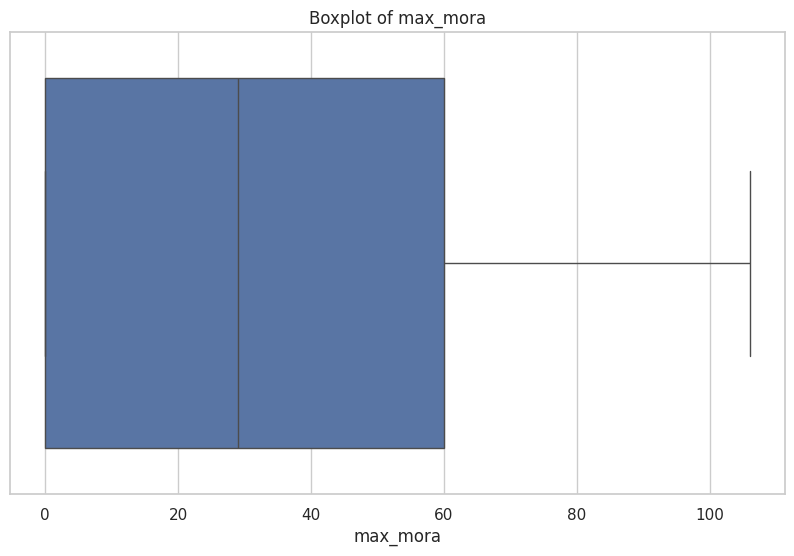

In [16]:
outlier_detector_maxmora.visualize_outliers()

In [17]:
outlier_detector_maxmora.replace_outliers()

,y,banca,segmento_x,producto_x,aplicativo_x,min_mora,max_mora,dias_mora_fin,rango_mora,vlr_obligacion,...,prob_auto_cura,producto_y,aplicativo_y,segmento_y,valor_cuota_mes_y,pago_total,porc_pago,marca_pago_y,ajustes_banco,antiguedad
0,1,Banca Personas,Personal,TARJETA DE CREDITO,V,46.0,71.0,71,b.31-90,6056996.0,...,0.217264,TARJETA DE CREDITO,V,PERSONAL,0.0,0.0,0.0,CANCELADO,NO,1281
1,1,Banca Personas,Personal,LIBRE INVERSION,L,16.0,0.0,0,a.1-30,9877235.0,...,0.268250,LIBRE INVERSION,L,PERSONAL,443837.0,0.0,0.0,FACTURACION_MES_SGTE,NO,1951
2,1,Banca Personas,Personal,LIBRE INVERSION,L,36.0,65.0,65,b.31-90,79487960.0,...,0.143200,LIBRE INVERSION,L,PERSONAL,5122226.0,0.0,0.0,NO_PAGO,NO,13293
3,1,Banca Personas,Personal plus,ROTATIVOS,L,18.0,32.0,32,a.1-30,822626.0,...,0.272365,ROTATIVOS,L,PERSONAL PLUS,43492.0,0.0,0.0,CANCELADO,NO,14185
4,1,Independientes,Micropyme,CARTERA ORDINARIA,L,15.0,0.0,0,a.1-30,37271605.0,...,0.468850,CARTERA ORDINARIA,L,MICROPYME,5214940.0,36506471.0,700.0,PAGO_MENOS,NO,5606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456228,0,Banca Personas,Personal plus,TARJETA DE CREDITO,K,29.0,57.0,57,a.1-30,5986670.0,...,0.601680,TARJETA DE CREDITO,K,PERSONAL PLUS,4713882.0,0.0,0.0,NO_PAGO,NO,2687
456229,0,Independientes,Micropyme,TARJETA DE CREDITO,V,5.0,26.0,26,a.1-30,2812265.0,...,0.660651,TARJETA DE CREDITO,V,MICROPYME,1646612.0,1650000.0,100.0,CANCELADO,NO,3177
456230,0,Independientes,Micropyme,TARJETA DE CREDITO,V,2.0,29.0,29,a.1-30,6776287.0,...,0.704581,TARJETA DE CREDITO,V,MICROPYME,951816.0,0.0,0.0,NO_PAGO,NO,3477
456231,1,Independientes,Micropyme,TARJETA DE CREDITO,M,15.0,0.0,0,a.1-30,2090565.0,...,0.645309,TARJETA DE CREDITO,M,MICROPYME,474973.0,1558708.0,328.0,FACTURACION_MES_SGTE,NO,3702


Aplicación a la variable dias mora

In [18]:
outlier_detector_diasmora = OutlierDetector(df, 'dias_mora_fin')

In [19]:
outlier_detector_diasmora.detect_errors()

,y,banca,segmento_x,producto_x,aplicativo_x,min_mora,max_mora,dias_mora_fin,rango_mora,vlr_obligacion,...,prob_auto_cura,producto_y,aplicativo_y,segmento_y,valor_cuota_mes_y,pago_total,porc_pago,marca_pago_y,ajustes_banco,antiguedad
1,1,Banca Personas,Personal,LIBRE INVERSION,L,16.0,0.0,0,a.1-30,9877235.0,...,0.268250,LIBRE INVERSION,L,PERSONAL,443837.0,0.0,0.0,FACTURACION_MES_SGTE,NO,1951
4,1,Independientes,Micropyme,CARTERA ORDINARIA,L,15.0,0.0,0,a.1-30,37271605.0,...,0.468850,CARTERA ORDINARIA,L,MICROPYME,5214940.0,36506471.0,700.0,PAGO_MENOS,NO,5606
12,1,Banca Personas,Personal plus,ROTATIVOS,L,51.0,0.0,0,b.31-90,4614183.0,...,0.183178,ROTATIVOS,L,PERSONAL PLUS,448259.0,0.0,0.0,NO_PAGO,NO,1274
16,1,Banca Personas,Personal,TARJETA DE CREDITO,K,5.0,0.0,0,a.1-30,6129795.0,...,0.479743,TARJETA DE CREDITO,K,PERSONAL,54789.0,263150.0,480.0,FACTURACION_MES_SGTE,NO,1963
18,0,Banca Personas,Personal,TARJETA DE CREDITO,M,5.0,0.0,0,a.1-30,951872.0,...,0.270953,TARJETA DE CREDITO,M,PERSONAL,233552.0,0.0,0.0,NO_PAGO,NO,949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456225,0,Banca Pyme,Pymes,TARJETA DE CREDITO,V,1.0,0.0,0,a.1-30,1235465.0,...,0.087783,TARJETA DE CREDITO,V,PYMES,0.0,0.0,0.0,FACTURACION_MES_SGTE,NO,7620
456226,0,Banca Pyme,Pymes,TARJETA DE CREDITO,V,1.0,0.0,0,a.1-30,2931100.0,...,0.087783,TARJETA DE CREDITO,V,PYMES,0.0,0.0,0.0,FACTURACION_MES_SGTE,NO,7620
456227,1,Independientes,Micropyme,TARJETA DE CREDITO,M,47.0,0.0,0,b.31-90,4434500.0,...,0.612704,TARJETA DE CREDITO,M,MICROPYME,354933.0,12182.0,3.0,PAGO_MENOS,NO,7776
456231,1,Independientes,Micropyme,TARJETA DE CREDITO,M,15.0,0.0,0,a.1-30,2090565.0,...,0.645309,TARJETA DE CREDITO,M,MICROPYME,474973.0,1558708.0,328.0,FACTURACION_MES_SGTE,NO,3702


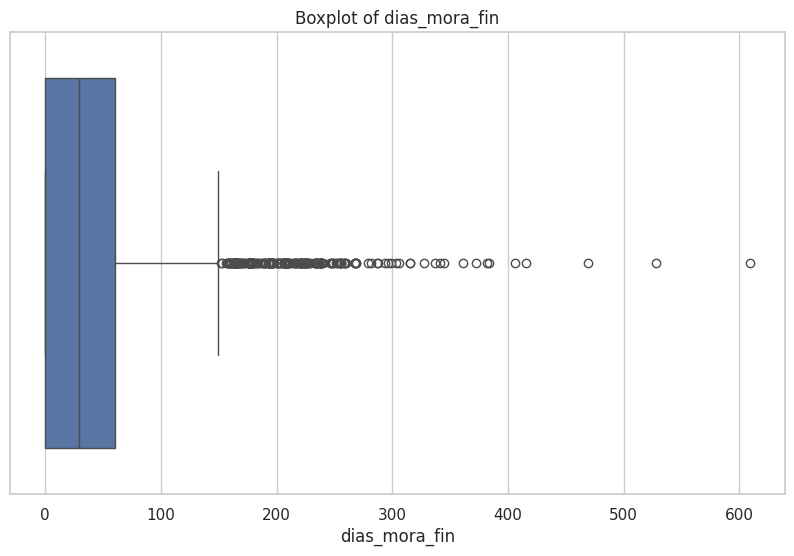

In [20]:
outlier_detector_diasmora.visualize_outliers()

Se observa una gran cantidad de datos outliers (por encima del percentil 98)

In [21]:
outlier_detector_diasmora.replace_outliers()

,y,banca,segmento_x,producto_x,aplicativo_x,min_mora,max_mora,dias_mora_fin,rango_mora,vlr_obligacion,...,prob_auto_cura,producto_y,aplicativo_y,segmento_y,valor_cuota_mes_y,pago_total,porc_pago,marca_pago_y,ajustes_banco,antiguedad
0,1,Banca Personas,Personal,TARJETA DE CREDITO,V,46.0,71.0,71.0,b.31-90,6056996.0,...,0.217264,TARJETA DE CREDITO,V,PERSONAL,0.0,0.0,0.0,CANCELADO,NO,1281
1,1,Banca Personas,Personal,LIBRE INVERSION,L,16.0,0.0,0.0,a.1-30,9877235.0,...,0.268250,LIBRE INVERSION,L,PERSONAL,443837.0,0.0,0.0,FACTURACION_MES_SGTE,NO,1951
2,1,Banca Personas,Personal,LIBRE INVERSION,L,36.0,65.0,65.0,b.31-90,79487960.0,...,0.143200,LIBRE INVERSION,L,PERSONAL,5122226.0,0.0,0.0,NO_PAGO,NO,13293
3,1,Banca Personas,Personal plus,ROTATIVOS,L,18.0,32.0,32.0,a.1-30,822626.0,...,0.272365,ROTATIVOS,L,PERSONAL PLUS,43492.0,0.0,0.0,CANCELADO,NO,14185
4,1,Independientes,Micropyme,CARTERA ORDINARIA,L,15.0,0.0,0.0,a.1-30,37271605.0,...,0.468850,CARTERA ORDINARIA,L,MICROPYME,5214940.0,36506471.0,700.0,PAGO_MENOS,NO,5606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456228,0,Banca Personas,Personal plus,TARJETA DE CREDITO,K,29.0,57.0,57.0,a.1-30,5986670.0,...,0.601680,TARJETA DE CREDITO,K,PERSONAL PLUS,4713882.0,0.0,0.0,NO_PAGO,NO,2687
456229,0,Independientes,Micropyme,TARJETA DE CREDITO,V,5.0,26.0,26.0,a.1-30,2812265.0,...,0.660651,TARJETA DE CREDITO,V,MICROPYME,1646612.0,1650000.0,100.0,CANCELADO,NO,3177
456230,0,Independientes,Micropyme,TARJETA DE CREDITO,V,2.0,29.0,29.0,a.1-30,6776287.0,...,0.704581,TARJETA DE CREDITO,V,MICROPYME,951816.0,0.0,0.0,NO_PAGO,NO,3477
456231,1,Independientes,Micropyme,TARJETA DE CREDITO,M,15.0,0.0,0.0,a.1-30,2090565.0,...,0.645309,TARJETA DE CREDITO,M,MICROPYME,474973.0,1558708.0,328.0,FACTURACION_MES_SGTE,NO,3702


Aplicación a la variable cantidad de alternativas posibles

In [22]:
outlier_detector_canaltposibles = OutlierDetector(df, 'cant_alter_posibles')

In [23]:
outlier_detector_canaltposibles.detect_errors()

,y,banca,segmento_x,producto_x,aplicativo_x,min_mora,max_mora,dias_mora_fin,rango_mora,vlr_obligacion,...,prob_auto_cura,producto_y,aplicativo_y,segmento_y,valor_cuota_mes_y,pago_total,porc_pago,marca_pago_y,ajustes_banco,antiguedad


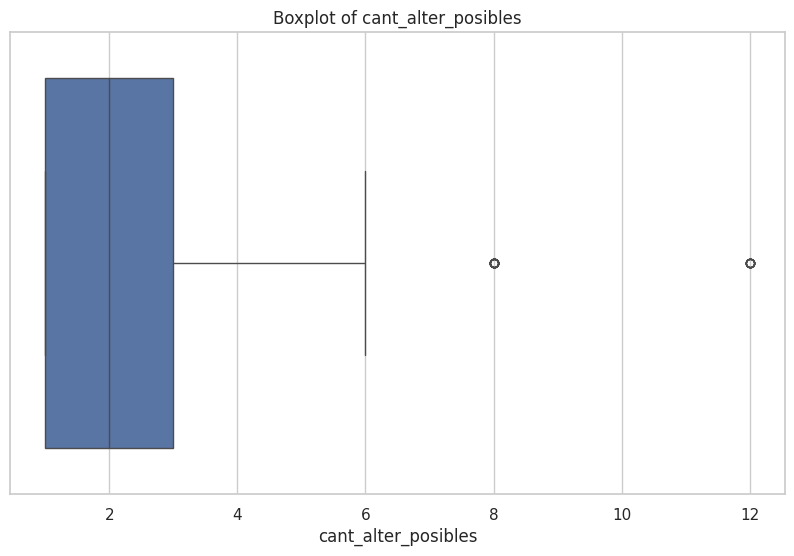

In [24]:
outlier_detector_canaltposibles.visualize_outliers()

Aplicación a la variable antiguedad

In [25]:
outlier_detector_antiguedad = OutlierDetector(df, 'antiguedad')

In [26]:
outlier_detector_antiguedad.detect_errors()

,y,banca,segmento_x,producto_x,aplicativo_x,min_mora,max_mora,dias_mora_fin,rango_mora,vlr_obligacion,...,prob_auto_cura,producto_y,aplicativo_y,segmento_y,valor_cuota_mes_y,pago_total,porc_pago,marca_pago_y,ajustes_banco,antiguedad


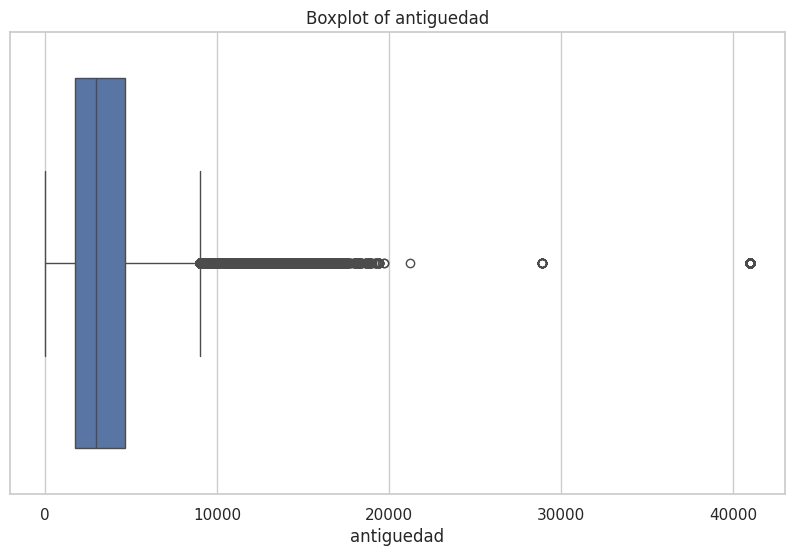

In [27]:
outlier_detector_antiguedad.visualize_outliers()

In [28]:
outlier_detector_antiguedad.replace_outliers()

,y,banca,segmento_x,producto_x,aplicativo_x,min_mora,max_mora,dias_mora_fin,rango_mora,vlr_obligacion,...,prob_auto_cura,producto_y,aplicativo_y,segmento_y,valor_cuota_mes_y,pago_total,porc_pago,marca_pago_y,ajustes_banco,antiguedad
0,1,Banca Personas,Personal,TARJETA DE CREDITO,V,46.0,71.0,71.0,b.31-90,6056996.0,...,0.217264,TARJETA DE CREDITO,V,PERSONAL,0.0,0.0,0.0,CANCELADO,NO,1281.0
1,1,Banca Personas,Personal,LIBRE INVERSION,L,16.0,0.0,0.0,a.1-30,9877235.0,...,0.268250,LIBRE INVERSION,L,PERSONAL,443837.0,0.0,0.0,FACTURACION_MES_SGTE,NO,1951.0
2,1,Banca Personas,Personal,LIBRE INVERSION,L,36.0,65.0,65.0,b.31-90,79487960.0,...,0.143200,LIBRE INVERSION,L,PERSONAL,5122226.0,0.0,0.0,NO_PAGO,NO,11291.0
3,1,Banca Personas,Personal plus,ROTATIVOS,L,18.0,32.0,32.0,a.1-30,822626.0,...,0.272365,ROTATIVOS,L,PERSONAL PLUS,43492.0,0.0,0.0,CANCELADO,NO,11291.0
4,1,Independientes,Micropyme,CARTERA ORDINARIA,L,15.0,0.0,0.0,a.1-30,37271605.0,...,0.468850,CARTERA ORDINARIA,L,MICROPYME,5214940.0,36506471.0,700.0,PAGO_MENOS,NO,5606.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456228,0,Banca Personas,Personal plus,TARJETA DE CREDITO,K,29.0,57.0,57.0,a.1-30,5986670.0,...,0.601680,TARJETA DE CREDITO,K,PERSONAL PLUS,4713882.0,0.0,0.0,NO_PAGO,NO,2687.0
456229,0,Independientes,Micropyme,TARJETA DE CREDITO,V,5.0,26.0,26.0,a.1-30,2812265.0,...,0.660651,TARJETA DE CREDITO,V,MICROPYME,1646612.0,1650000.0,100.0,CANCELADO,NO,3177.0
456230,0,Independientes,Micropyme,TARJETA DE CREDITO,V,2.0,29.0,29.0,a.1-30,6776287.0,...,0.704581,TARJETA DE CREDITO,V,MICROPYME,951816.0,0.0,0.0,NO_PAGO,NO,3477.0
456231,1,Independientes,Micropyme,TARJETA DE CREDITO,M,15.0,0.0,0.0,a.1-30,2090565.0,...,0.645309,TARJETA DE CREDITO,M,MICROPYME,474973.0,1558708.0,328.0,FACTURACION_MES_SGTE,NO,3702.0


### Análisis estadístico de variables vs la variable respuesta

#### Análisis de desbalanceo de datos

In [29]:
df['y'].value_counts()

y
0    237036
1    219197
Name: count, dtype: int64

Los datos no se encuentra desbalanceados, hay una proporción bastante equilibrada entre los registros de clientes que aceptaron la opción de pago y los que no. No es necesario aplicar técnicas de balanceo

#### Mininimo Mora

/tmp/ipykernel_2547/2521282356.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y',y='min_mora',data=df, palette="viridis")


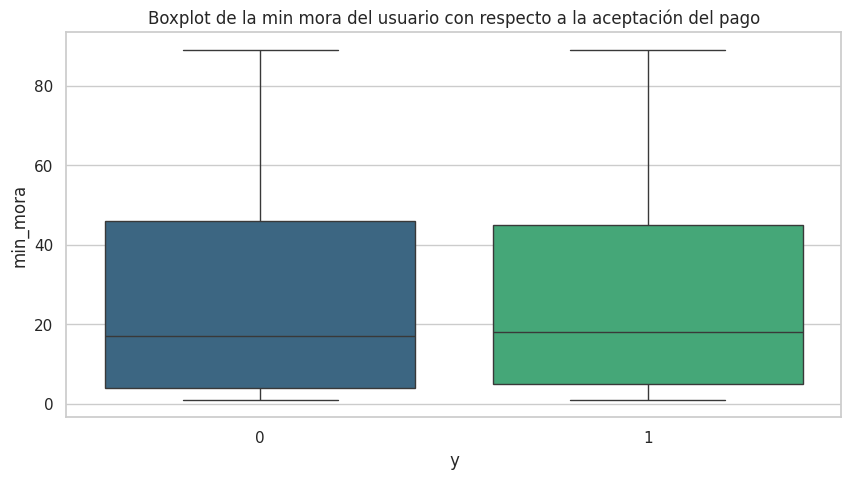

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(x='y',y='min_mora',data=df, palette="viridis")
plt.title('Boxplot de la min mora del usuario con respecto a la aceptación del pago')
plt.show()

A simple vista no se logra identificar una diferencia significativa entre el minimo de mora de las personas que aceptan la opción de pago y las que no

Prueba de hipótesis estadística de diferencia de medias para validar si hay diferencia estadísticamente significativa entre el min mora de las personas que aceptan una tarjeta de las que no

H0: Media de min mora de personas que aceptan = Media de min mora de personas que rechazan H1: Medida de edad de personas que aceptan <> Media de edad de personas que rechazan

In [31]:
minmora_accepted = df[df['y'] == 1]['min_mora']
minmora_rejected = df[df['y'] == 0]['min_mora']

statistic, p_value = mannwhitneyu(minmora_accepted, minmora_rejected)

print('Mann-Whitney U statistic:', statistic)
print('p-value:', p_value)

Mann-Whitney U statistic: 27356068348.0
p-value: 2.155567346846404e-211


De acuerdo a la prueba de hipótesis, es posible rechazar la hipótesis nula, por lo cual es posible concluir de que existe una diferencia estadísticamente significativa entre el minimo de mora de las personas que aceptan con respecto a las que la rechazan.

In [32]:
df['min_mora'].describe()

count    456233.000000
mean         26.826317
std          25.811684
min           1.000000
25%           4.000000
50%          17.000000
75%          46.000000
max          89.000000
Name: min_mora, dtype: float64

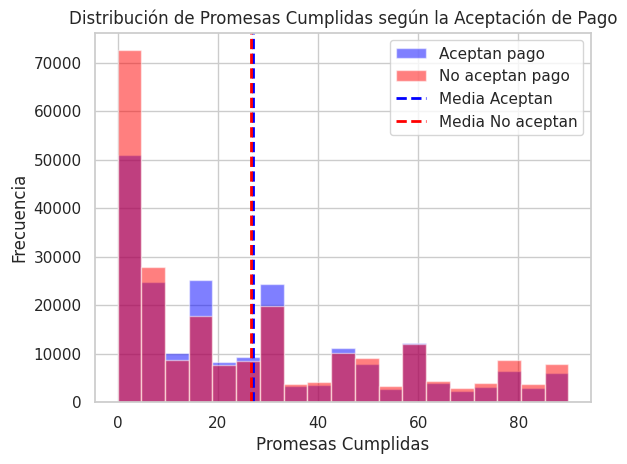

In [33]:
bins = np.linspace(0, 90, 20)

plt.hist(minmora_accepted, bins, alpha=0.5, label='Aceptan pago', color='blue')

plt.hist(minmora_rejected, bins, alpha=0.5, label='No aceptan pago', color='red')

plt.axvline(minmora_accepted.mean(), color='blue', linestyle='dashed', linewidth=2, label='Media Aceptan')
plt.axvline(minmora_rejected.mean(), color='red', linestyle='dashed', linewidth=2, label='Media No aceptan')

plt.legend(loc='upper right')
plt.xlabel('Promesas Cumplidas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Promesas Cumplidas según la Aceptación de Pago')
plt.grid(True)
plt.show()

La graficar los densogramas de cada una de las distribuciones de min mora por grupo (personas que aceptan y rechazan) tampoco se logra identificar una diferencia marcada, lo cual es una corroboración gráfica de los resultados obtenidos anteriormente

### Maximo mora

/tmp/ipykernel_2547/2084868551.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y',y='max_mora',data=df, palette="viridis")


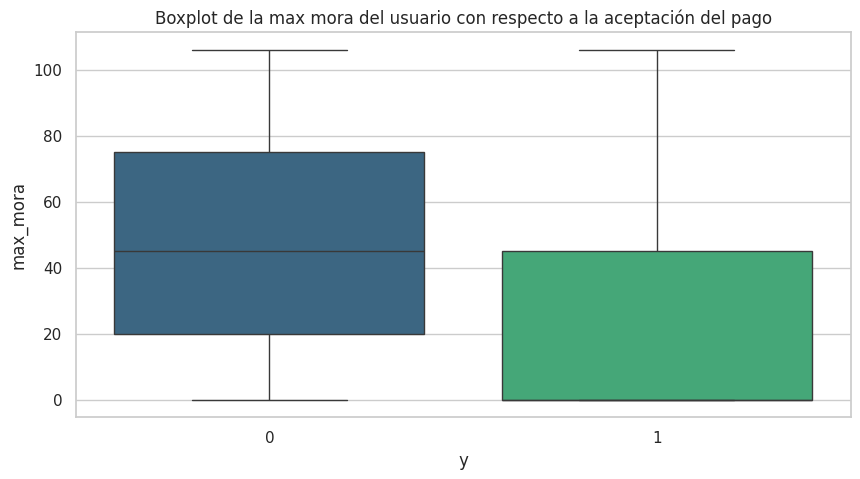

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(x='y',y='max_mora',data=df, palette="viridis")
plt.title('Boxplot de la max mora del usuario con respecto a la aceptación del pago')
plt.show()

In [35]:
maxmora_accepted = df[df['y'] == 1]['max_mora']
maxmora_rejected = df[df['y'] == 0]['max_mora']

statistic, p_value = mannwhitneyu(maxmora_accepted, maxmora_rejected)

print('Mann-Whitney U statistic:', statistic)
print('p-value:', p_value)

Mann-Whitney U statistic: 14040140992.0
p-value: 0.0


In [36]:
df['max_mora'].describe()

count    456233.000000
mean         36.791411
std          34.092350
min           0.000000
25%           0.000000
50%          29.000000
75%          60.000000
max         106.000000
Name: max_mora, dtype: float64

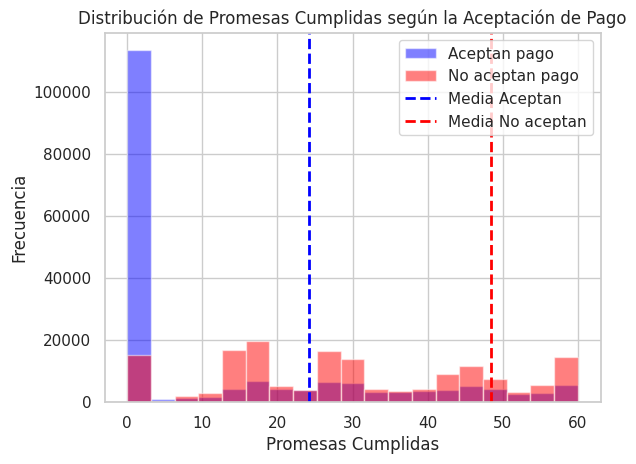

In [37]:
bins = np.linspace(0, 60, 20)

plt.hist(maxmora_accepted, bins, alpha=0.5, label='Aceptan pago', color='blue')

plt.hist(maxmora_rejected, bins, alpha=0.5, label='No aceptan pago', color='red')

plt.axvline(maxmora_accepted.mean(), color='blue', linestyle='dashed', linewidth=2, label='Media Aceptan')
plt.axvline(maxmora_rejected.mean(), color='red', linestyle='dashed', linewidth=2, label='Media No aceptan')

plt.legend(loc='upper right')
plt.xlabel('Promesas Cumplidas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Promesas Cumplidas según la Aceptación de Pago')
plt.grid(True)
plt.show()

### Días de mora

/tmp/ipykernel_2547/3854077608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y',y='dias_mora_fin',data=df, palette="viridis")


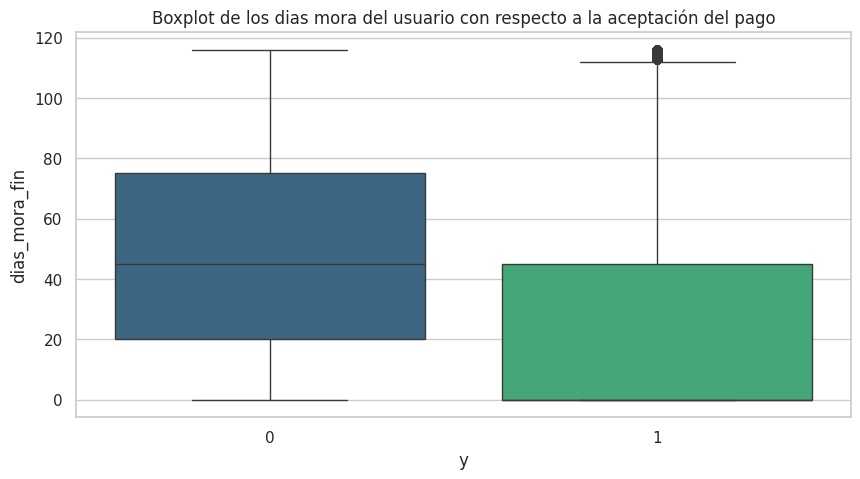

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(x='y',y='dias_mora_fin',data=df, palette="viridis")
plt.title('Boxplot de los dias mora del usuario con respecto a la aceptación del pago')
plt.show()

In [39]:
dias_mora_fin_accepted = df[df['y'] == 1]['dias_mora_fin']
dias_mora_fin_rejected = df[df['y'] == 0]['dias_mora_fin']

statistic, p_value = mannwhitneyu(dias_mora_fin_accepted, dias_mora_fin_rejected)

print('Mann-Whitney U statistic:', statistic)
print('p-value:', p_value)

Mann-Whitney U statistic: 14036238335.5
p-value: 0.0


In [40]:
df['dias_mora_fin'].describe()

count    456233.000000
mean         37.116890
std          34.784338
min           0.000000
25%           0.000000
50%          29.000000
75%          60.000000
max         116.000000
Name: dias_mora_fin, dtype: float64

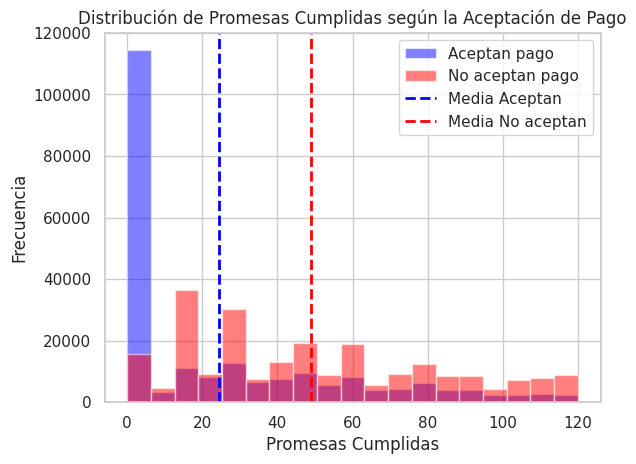

In [41]:
bins = np.linspace(0, 120, 20)

plt.hist(dias_mora_fin_accepted, bins, alpha=0.5, label='Aceptan pago', color='blue')

plt.hist(dias_mora_fin_rejected, bins, alpha=0.5, label='No aceptan pago', color='red')

plt.axvline(dias_mora_fin_accepted.mean(), color='blue', linestyle='dashed', linewidth=2, label='Media Aceptan')
plt.axvline(dias_mora_fin_rejected.mean(), color='red', linestyle='dashed', linewidth=2, label='Media No aceptan')

plt.legend(loc='upper right')
plt.xlabel('Promesas Cumplidas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Promesas Cumplidas según la Aceptación de Pago')
plt.grid(True)
plt.show()

### Cantidad de alternativas

/tmp/ipykernel_2547/425516194.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y',y='cant_alter_posibles',data=df, palette="viridis")


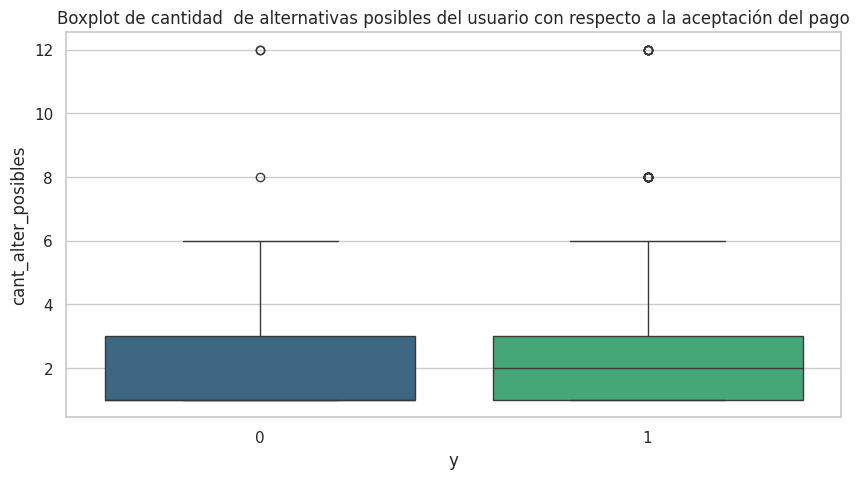

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(x='y',y='cant_alter_posibles',data=df, palette="viridis")
plt.title('Boxplot de cantidad  de alternativas posibles del usuario con respecto a la aceptación del pago')
plt.show()

In [43]:
cantidadalt_accepted = df[df['y'] == 1]['cant_alter_posibles']
cantidadalt_rejected = df[df['y'] == 0]['cant_alter_posibles']

statistic, p_value = mannwhitneyu(cantidadalt_accepted, cantidadalt_rejected)

print('Mann-Whitney U statistic:', statistic)
print('p-value:', p_value)

Mann-Whitney U statistic: 29217087030.5
p-value: 0.0


In [44]:
df['cant_alter_posibles'].describe()

count    456233.000000
mean          1.810242
std           0.864049
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          12.000000
Name: cant_alter_posibles, dtype: float64

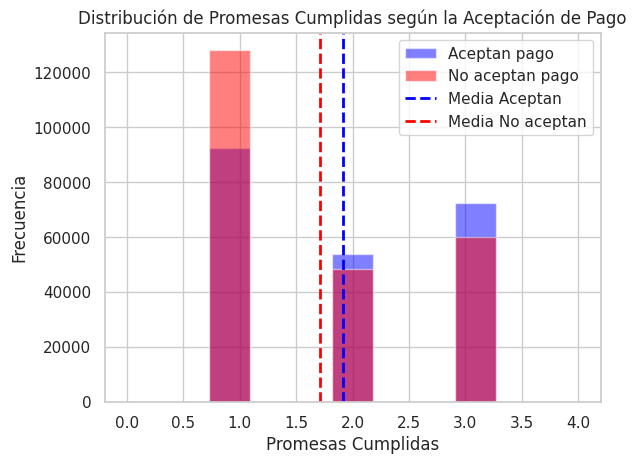

In [45]:
bins = np.linspace(0, 4, 12)

plt.hist(cantidadalt_accepted, bins, alpha=0.5, label='Aceptan pago', color='blue')

plt.hist(cantidadalt_rejected, bins, alpha=0.5, label='No aceptan pago', color='red')

plt.axvline(cantidadalt_accepted.mean(), color='blue', linestyle='dashed', linewidth=2, label='Media Aceptan')
plt.axvline(cantidadalt_rejected.mean(), color='red', linestyle='dashed', linewidth=2, label='Media No aceptan')

plt.legend(loc='upper right')
plt.xlabel('Promesas Cumplidas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Promesas Cumplidas según la Aceptación de Pago')
plt.grid(True)
plt.show()

### Cantidad de promesas cumplidas

/tmp/ipykernel_2547/1310847198.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y',y='promesas_cumplidas',data=df, palette="viridis")


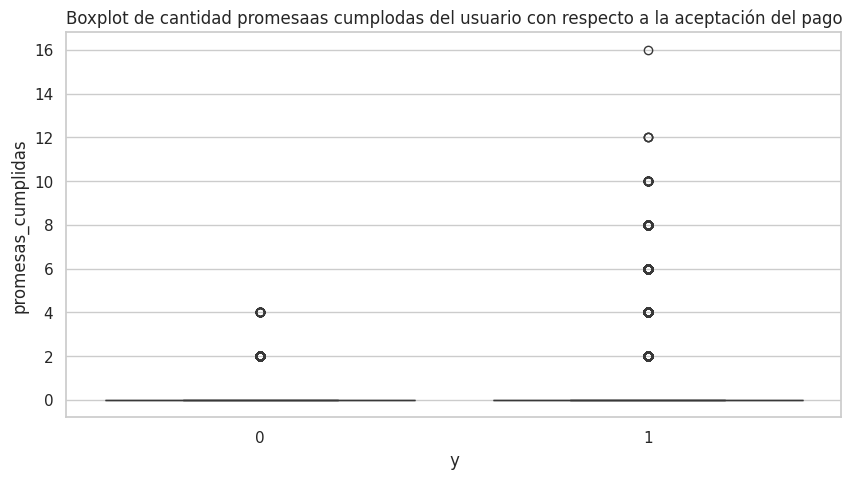

In [46]:
plt.figure(figsize=(10,5))
sns.boxplot(x='y',y='promesas_cumplidas',data=df, palette="viridis")
plt.title('Boxplot de cantidad promesaas cumplodas del usuario con respecto a la aceptación del pago')
plt.show()

In [47]:
promesascumpl_accepted = df[df['y'] == 1]['promesas_cumplidas']
promesascumpl_rejected = df[df['y'] == 0]['promesas_cumplidas']

statistic, p_value = mannwhitneyu(promesascumpl_accepted, promesascumpl_rejected)

print('Mann-Whitney U statistic:', statistic)
print('p-value:', p_value)

Mann-Whitney U statistic: 31012721335.0
p-value: 0.0


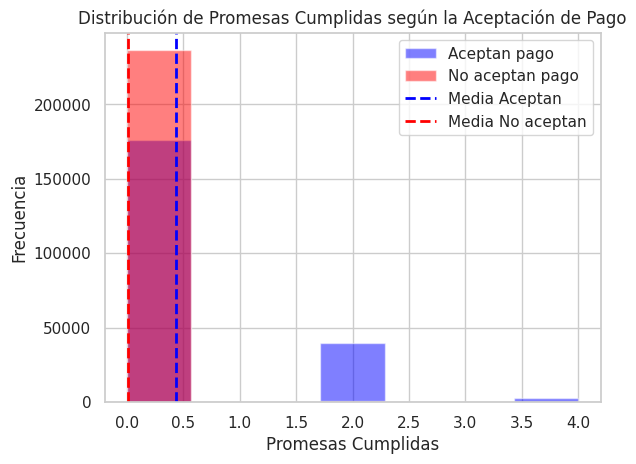

In [48]:
bins = np.linspace(0, 4, 8)

plt.hist(promesascumpl_accepted, bins, alpha=0.5, label='Aceptan pago', color='blue')

plt.hist(promesascumpl_rejected, bins, alpha=0.5, label='No aceptan pago', color='red')

plt.axvline(promesascumpl_accepted.mean(), color='blue', linestyle='dashed', linewidth=2, label='Media Aceptan')
plt.axvline(promesascumpl_rejected.mean(), color='red', linestyle='dashed', linewidth=2, label='Media No aceptan')

plt.legend(loc='upper right')
plt.xlabel('Promesas Cumplidas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Promesas Cumplidas según la Aceptación de Pago')
plt.grid(True)
plt.show()

### Antiguedad

/tmp/ipykernel_2547/3526544940.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y',y='antiguedad',data=df, palette="viridis")


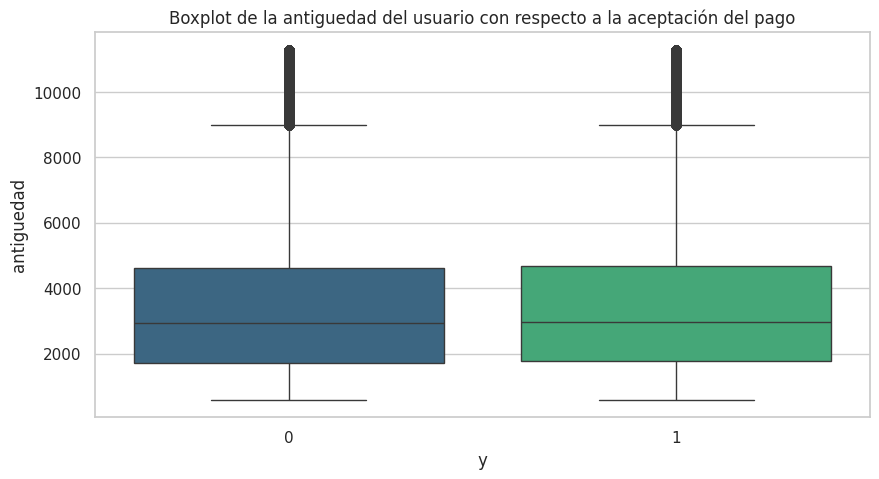

In [49]:
plt.figure(figsize=(10,5))
sns.boxplot(x='y',y='antiguedad',data=df, palette="viridis")
plt.title('Boxplot de la antiguedad del usuario con respecto a la aceptación del pago')
plt.show()

In [50]:
antiguedad_accepted = df[df['y'] == 1]['antiguedad']
antiguedad_rejected = df[df['y'] == 0]['antiguedad']

statistic, p_value = mannwhitneyu(antiguedad_accepted, antiguedad_rejected)

print('Mann-Whitney U statistic:', statistic)
print('p-value:', p_value)

Mann-Whitney U statistic: 26338841945.5
p-value: 5.448964558936981e-16


In [51]:
df['antiguedad'].describe()

count    456233.000000
mean       3655.678785
std        2586.528011
min         591.000000
25%        1757.000000
50%        2964.000000
75%        4646.000000
max       11291.000000
Name: antiguedad, dtype: float64

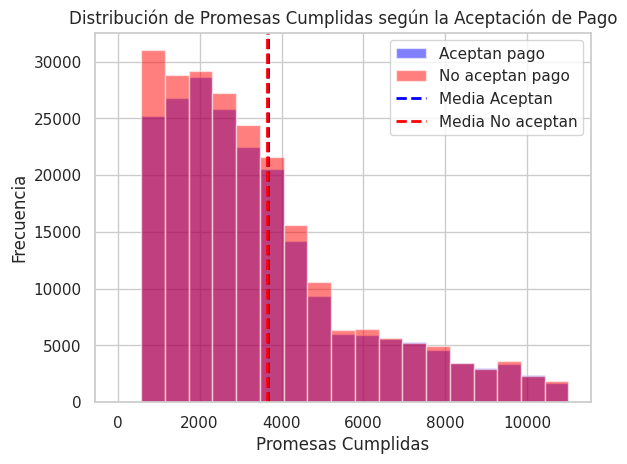

In [52]:
bins = np.linspace(0, 11000, 20)

plt.hist(antiguedad_accepted, bins, alpha=0.5, label='Aceptan pago', color='blue')

plt.hist(antiguedad_rejected, bins, alpha=0.5, label='No aceptan pago', color='red')

plt.axvline(antiguedad_accepted.mean(), color='blue', linestyle='dashed', linewidth=2, label='Media Aceptan')
plt.axvline(antiguedad_rejected.mean(), color='red', linestyle='dashed', linewidth=2, label='Media No aceptan')

plt.legend(loc='upper right')
plt.xlabel('Promesas Cumplidas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Promesas Cumplidas según la Aceptación de Pago')
plt.grid(True)
plt.show()

## Análisis Estadístico de las variables categóricas

In [53]:
cat_vars = df.select_dtypes(include=['object']).columns
cat_vars

Index(['banca', 'segmento_x', 'producto_x', 'aplicativo_x', 'rango_mora',
       'alter_posible1_2', 'cant_promesas_cumplidas_binario',
       'descripcion_ranking_post_ult', 'marca_debito_mora', 'marca_pago_x',
       'tipo_cli', 'ctrl_terc', 'genero_cli', 'ocup', 'subsector',
       'declarante', 'origen_fondos', 'cli_actualizado', 'subsegm',
       'region_of', 'ciiu', 'nit_num_oblig_id', 'nit_num_oblig', 'producto_y',
       'aplicativo_y', 'segmento_y', 'marca_pago_y', 'ajustes_banco'],
      dtype='object')

In [54]:
def grafico_frecuencia(variable):
    result = df.groupby([variable, 'y']).size().unstack()
    result['Total'] = result.sum(axis=1)
    result['% Aceptacion'] = result[1]/result['Total']
    plt.figure(figsize=(20,5))
    sns.barplot(x=result.index,y=result['% Aceptacion'], palette="viridis")
    for i in range(result.shape[0]):
        plt.text(x=i , y=result['% Aceptacion'][i], s=result['Total'][i], horizontalalignment='center')
    plt.xlabel(variable)
    plt.ylabel('% Aceptacion')
    plt.title('Gráfico de frecuencia de la variable '+variable+' con respecto a la aceptación del pago')
    return plt.show(), result

In [55]:
def test_value(variable):
    contingency_table = pd.crosstab(df[variable], df['y'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return 'p value:', p

### Banca

/tmp/ipykernel_2547/2693898568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result.index,y=result['% Aceptacion'], palette="viridis")
/tmp/ipykernel_2547/2693898568.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=i , y=result['% Aceptacion'][i], s=result['Total'][i], horizontalalignment='center')


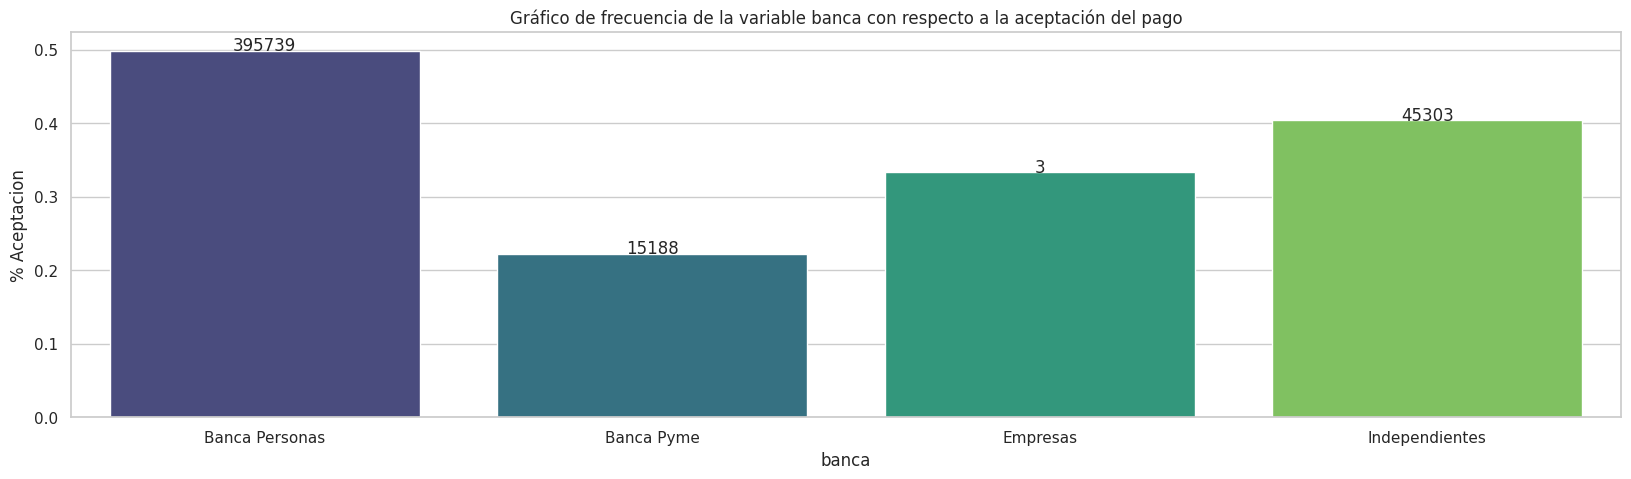

(None,
 y                    0       1   Total  % Aceptacion
 banca                                               
 Banca Personas  198229  197510  395739      0.499092
 Banca Pyme       11803    3385   15188      0.222873
 Empresas             2       1       3      0.333333
 Independientes   27002   18301   45303      0.403969)

In [56]:
grafico_frecuencia('banca')

De acuerdo a los resultados anteriores, Banca personas e independientes son el grupo de población que proporcionalmente más aceptan opción de pago

In [57]:
test_value('banca')

('p value:', np.float64(0.0))

De acuerdo a la prueba de hipótesis, es posible rechazar la hipótesis nula, por lo cual es posible concluir de que existe una diferencia estadísticamente significativa entre el tipo de banca de las personas con respecto a la probabilidad de que acepten o no una opción de pago

### Segmento

/tmp/ipykernel_2547/2693898568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result.index,y=result['% Aceptacion'], palette="viridis")
/tmp/ipykernel_2547/2693898568.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=i , y=result['% Aceptacion'][i], s=result['Total'][i], horizontalalignment='center')


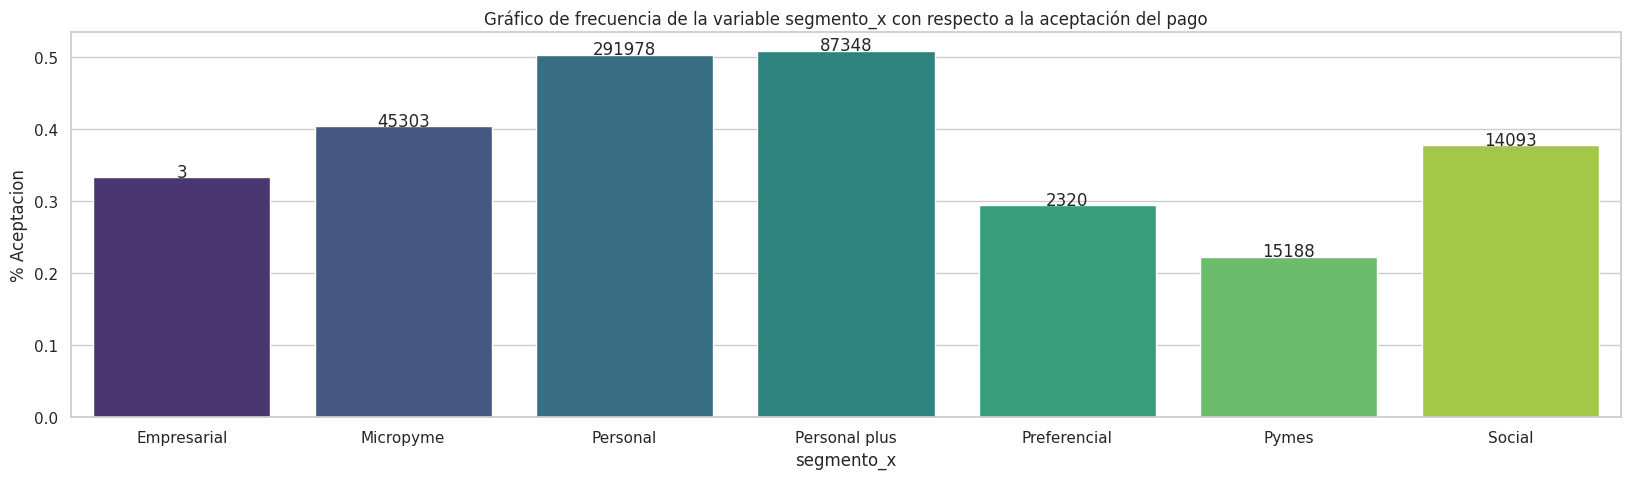

(None,
 y                   0       1   Total  % Aceptacion
 segmento_x                                         
 Empresarial         2       1       3      0.333333
 Micropyme       27002   18301   45303      0.403969
 Personal       144963  147015  291978      0.503514
 Personal plus   42864   44484   87348      0.509273
 Preferencial     1636     684    2320      0.294828
 Pymes           11803    3385   15188      0.222873
 Social           8766    5327   14093      0.377989)

In [58]:
grafico_frecuencia('segmento_x')

In [59]:
test_value('segmento_x')

('p value:', np.float64(0.0))

In [60]:
test_value('producto_x')

('p value:', np.float64(0.0))

### Aplicativo

/tmp/ipykernel_2547/2693898568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result.index,y=result['% Aceptacion'], palette="viridis")
/tmp/ipykernel_2547/2693898568.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=i , y=result['% Aceptacion'][i], s=result['Total'][i], horizontalalignment='center')


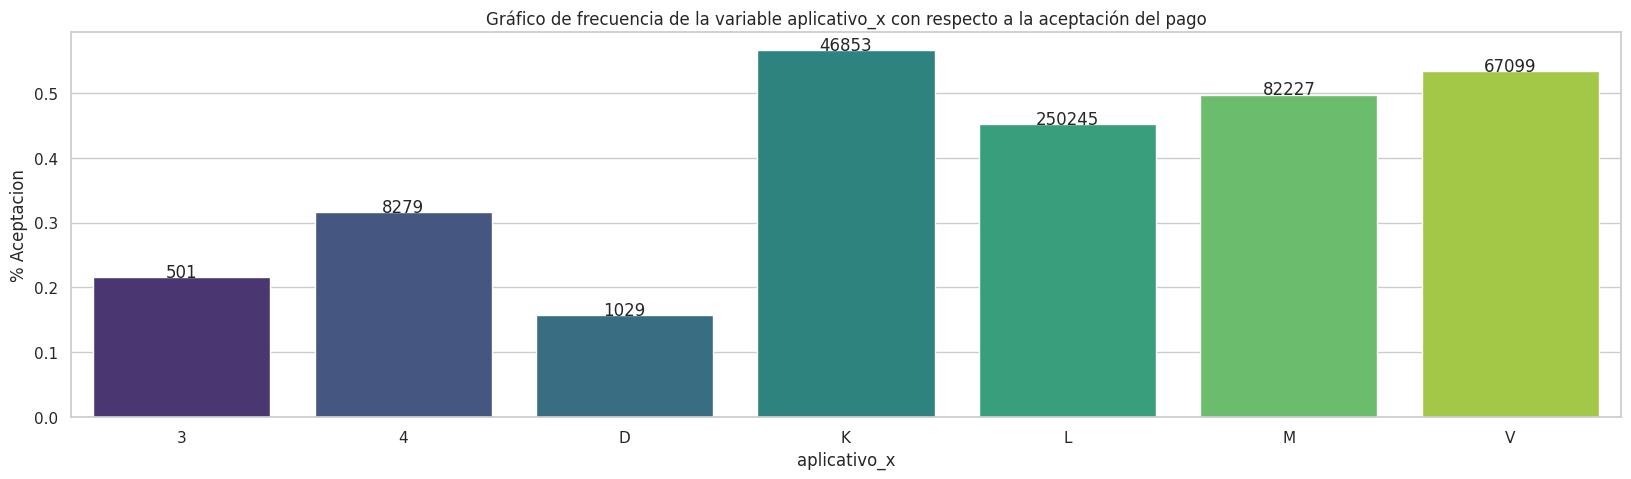

(None,
 y                  0       1   Total  % Aceptacion
 aplicativo_x                                      
 3                393     108     501      0.215569
 4               5662    2617    8279      0.316101
 D                867     162    1029      0.157434
 K              20341   26512   46853      0.565855
 L             137203  113042  250245      0.451725
 M              41309   40918   82227      0.497622
 V              31261   35838   67099      0.534106)

In [61]:
grafico_frecuencia('aplicativo_x')

In [62]:
test_value('aplicativo_x')

('p value:', np.float64(0.0))

### Rango mora

/tmp/ipykernel_2547/2693898568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result.index,y=result['% Aceptacion'], palette="viridis")
/tmp/ipykernel_2547/2693898568.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=i , y=result['% Aceptacion'][i], s=result['Total'][i], horizontalalignment='center')


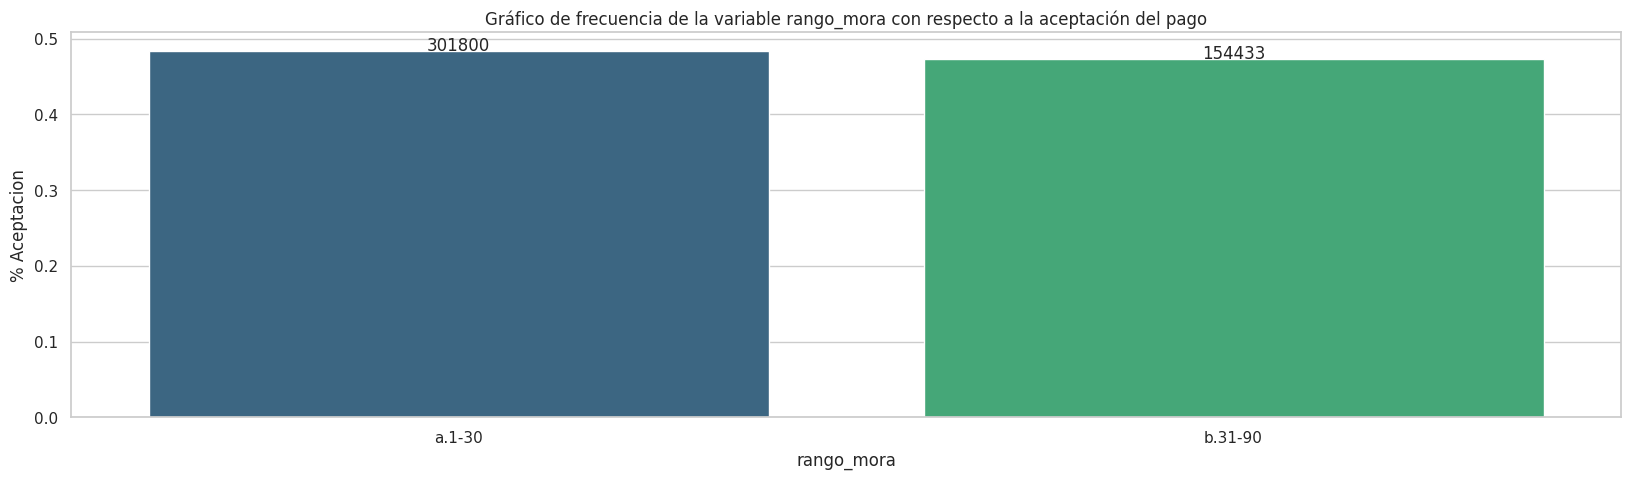

(None,
 y                0       1   Total  % Aceptacion
 rango_mora                                      
 a.1-30      155684  146116  301800      0.484148
 b.31-90      81352   73081  154433      0.473221)

In [63]:
grafico_frecuencia('rango_mora')

In [64]:
test_value('rango_mora')

('p value:', np.float64(2.8031142417851007e-12))

### Canidad promesas cumplidas (binario)

/tmp/ipykernel_2547/2693898568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result.index,y=result['% Aceptacion'], palette="viridis")
/tmp/ipykernel_2547/2693898568.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=i , y=result['% Aceptacion'][i], s=result['Total'][i], horizontalalignment='center')


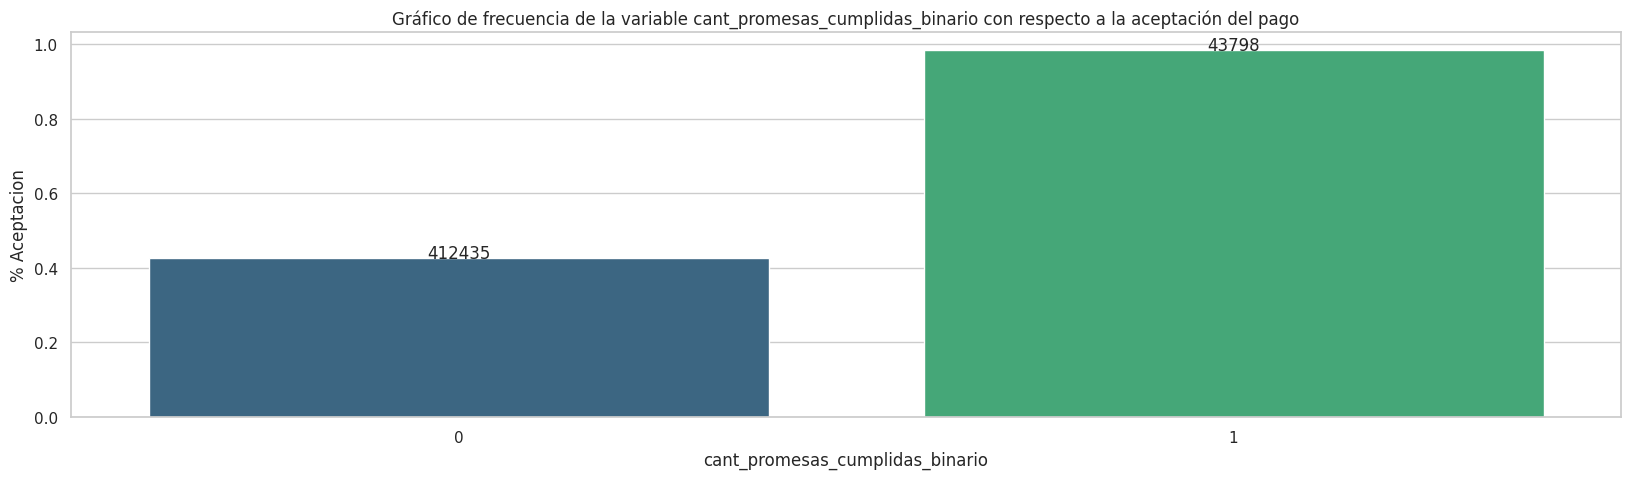

(None,
 y                                     0       1   Total  % Aceptacion
 cant_promesas_cumplidas_binario                                      
 0                                236345  176090  412435      0.426952
 1                                   691   43107   43798      0.984223)

In [65]:
grafico_frecuencia('cant_promesas_cumplidas_binario')

In [66]:
test_value('cant_promesas_cumplidas_binario')

('p value:', np.float64(0.0))

### Tipo de cliente

/tmp/ipykernel_2547/2693898568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result.index,y=result['% Aceptacion'], palette="viridis")
/tmp/ipykernel_2547/2693898568.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=i , y=result['% Aceptacion'][i], s=result['Total'][i], horizontalalignment='center')


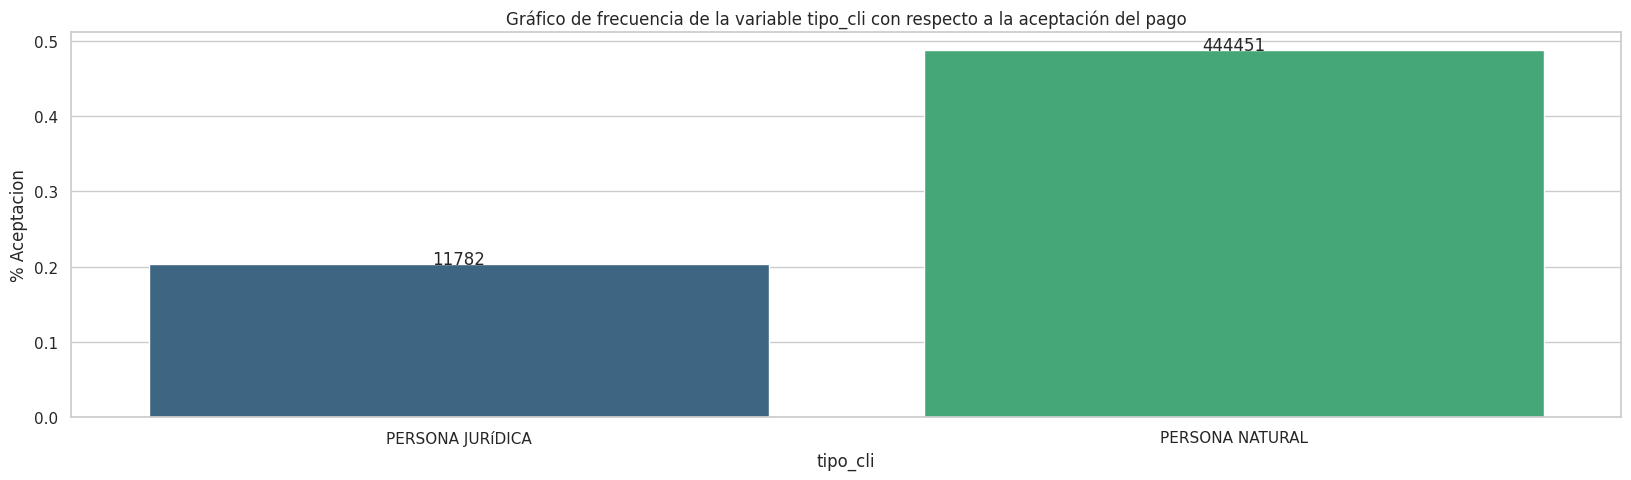

(None,
 y                      0       1   Total  % Aceptacion
 tipo_cli                                              
 PERSONA JURíDICA    9391    2391   11782      0.202937
 PERSONA NATURAL   227645  216806  444451      0.487806)

In [67]:
grafico_frecuencia('tipo_cli')

In [68]:
test_value('tipo_cli')

('p value:', np.float64(0.0))

### Genero del cliente

/tmp/ipykernel_2547/2693898568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result.index,y=result['% Aceptacion'], palette="viridis")
/tmp/ipykernel_2547/2693898568.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=i , y=result['% Aceptacion'][i], s=result['Total'][i], horizontalalignment='center')


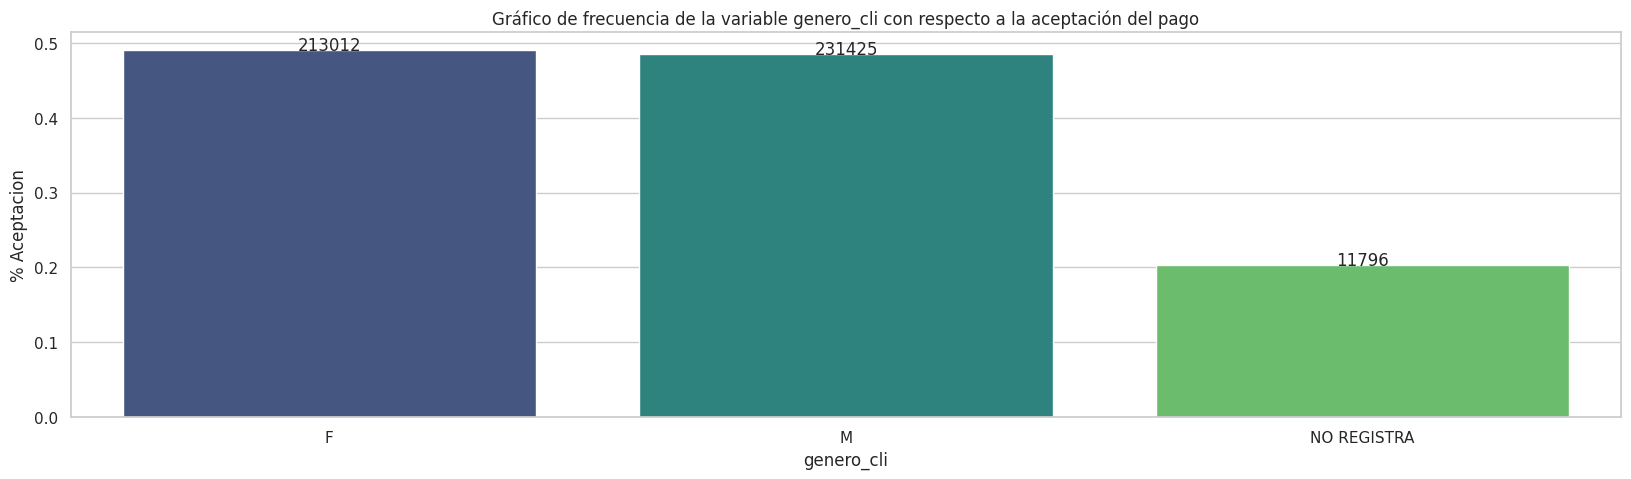

(None,
 y                 0       1   Total  % Aceptacion
 genero_cli                                       
 F            108595  104417  213012      0.490193
 M            119041  112384  231425      0.485617
 NO REGISTRA    9400    2396   11796      0.203120)

In [69]:
grafico_frecuencia('genero_cli')

In [70]:
test_value('genero_cli')

('p value:', np.float64(0.0))

### Subsector

/tmp/ipykernel_2547/2693898568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result.index,y=result['% Aceptacion'], palette="viridis")
/tmp/ipykernel_2547/2693898568.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=i , y=result['% Aceptacion'][i], s=result['Total'][i], horizontalalignment='center')


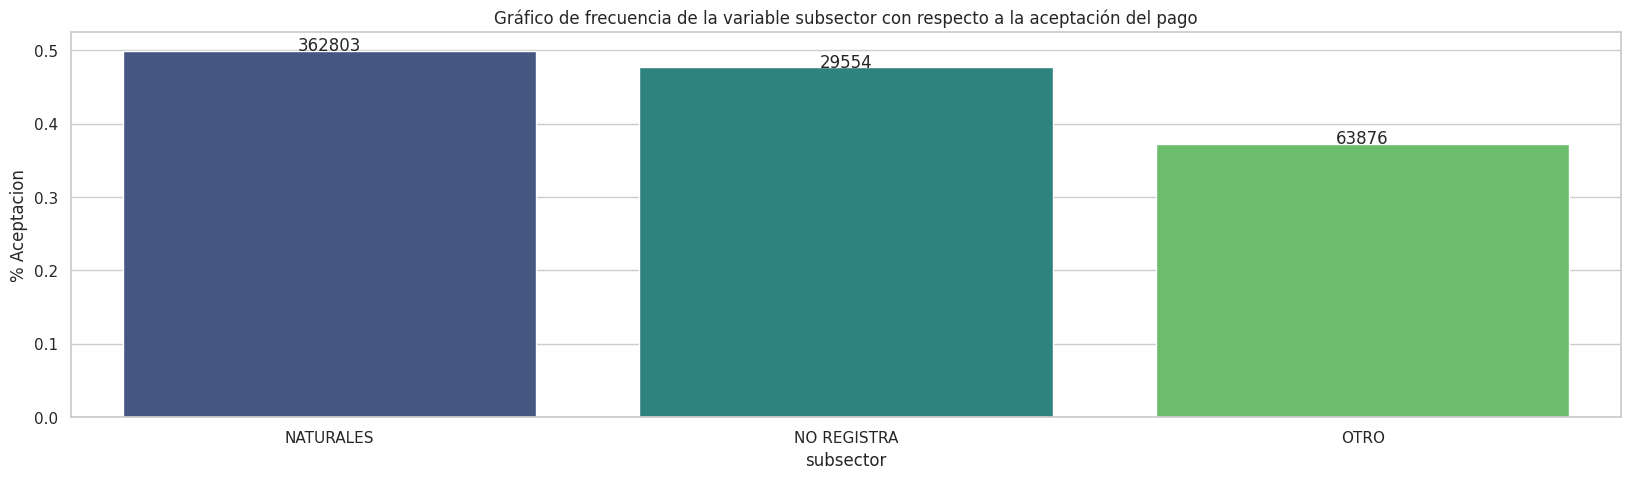

(None,
 y                 0       1   Total  % Aceptacion
 subsector                                        
 NATURALES    181527  181276  362803      0.499654
 NO REGISTRA   15456   14098   29554      0.477025
 OTRO          40053   23823   63876      0.372957)

In [71]:
grafico_frecuencia('subsector')

In [72]:
test_value('subsector')

('p value:', np.float64(0.0))

### Codigo ciiu

/tmp/ipykernel_2547/2693898568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result.index,y=result['% Aceptacion'], palette="viridis")
/tmp/ipykernel_2547/2693898568.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=i , y=result['% Aceptacion'][i], s=result['Total'][i], horizontalalignment='center')


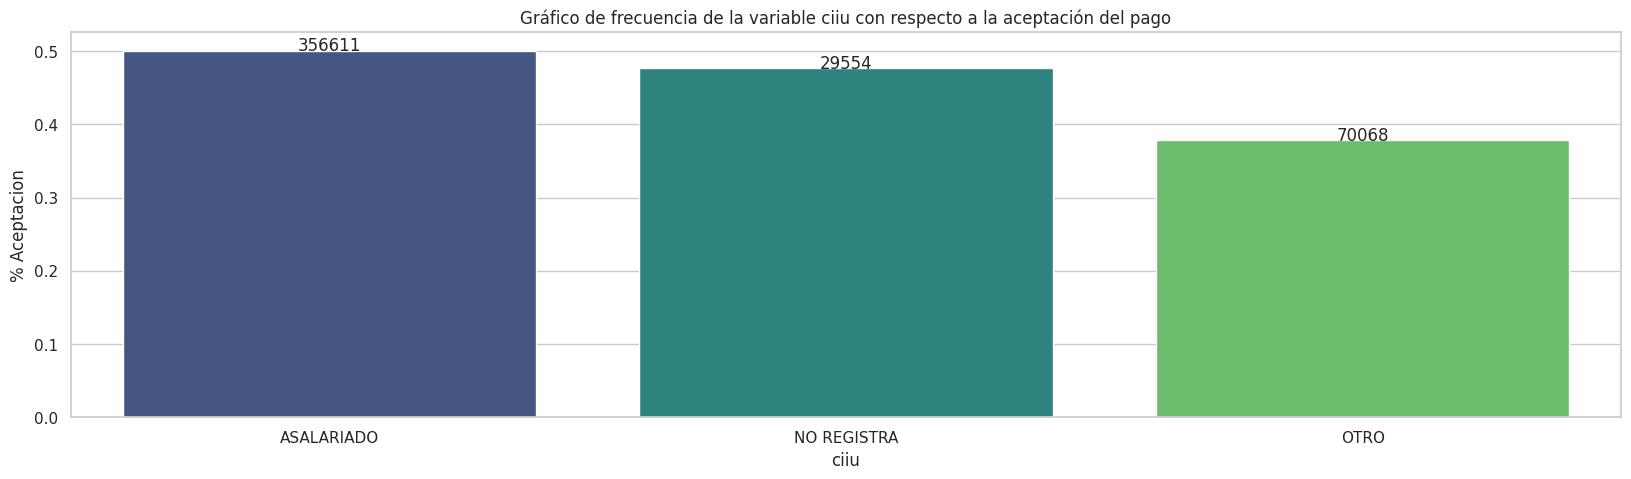

(None,
 y                 0       1   Total  % Aceptacion
 ciiu                                             
 ASALARIADO   178034  178577  356611      0.500761
 NO REGISTRA   15456   14098   29554      0.477025
 OTRO          43546   26522   70068      0.378518)

In [73]:
grafico_frecuencia('ciiu')

In [74]:
test_value('ciiu')

('p value:', np.float64(0.0))

### Porducto

/tmp/ipykernel_2547/2693898568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result.index,y=result['% Aceptacion'], palette="viridis")
/tmp/ipykernel_2547/2693898568.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=i , y=result['% Aceptacion'][i], s=result['Total'][i], horizontalalignment='center')
posx and posy should be finite values
posx and posy should be finite values


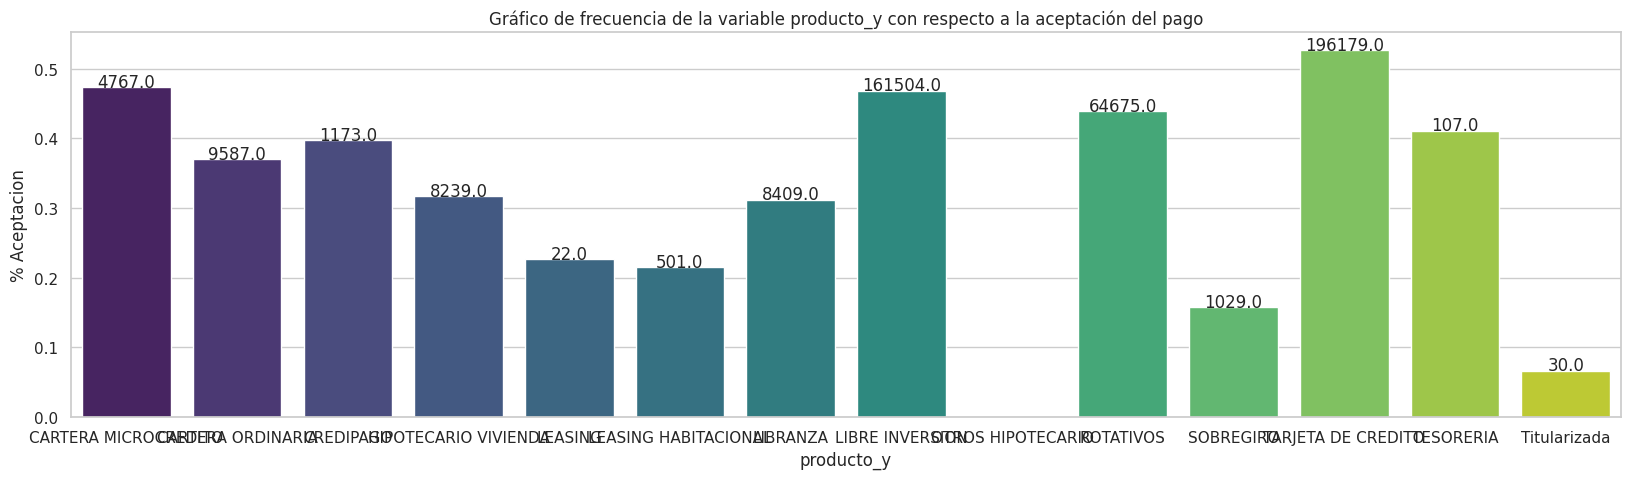

(None,
 y                           0         1     Total  % Aceptacion
 producto_y                                                     
 CARTERA MICROCREDITO   2508.0    2259.0    4767.0      0.473883
 CARTERA ORDINARIA      6040.0    3547.0    9587.0      0.369980
 CREDIPAGO               706.0     467.0    1173.0      0.398124
 HIPOTECARIO VIVIENDA   5624.0    2615.0    8239.0      0.317393
 LEASING                  17.0       5.0      22.0      0.227273
 LEASING HABITACIONAL    393.0     108.0     501.0      0.215569
 LIBRANZA               5785.0    2624.0    8409.0      0.312047
 LIBRE INVERSION       85830.0   75674.0  161504.0      0.468558
 OTROS HIPOTECARIO        11.0       NaN      11.0           NaN
 ROTATIVOS             36253.0   28422.0   64675.0      0.439459
 SOBREGIRO               867.0     162.0    1029.0      0.157434
 TARJETA DE CREDITO    92911.0  103268.0  196179.0      0.526397
 TESORERIA                63.0      44.0     107.0      0.411215
 Titularizada     

In [75]:
grafico_frecuencia('producto_y')

In [76]:
test_value('producto_y')

('p value:', np.float64(0.0))

### Segmento

/tmp/ipykernel_2547/2693898568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result.index,y=result['% Aceptacion'], palette="viridis")
/tmp/ipykernel_2547/2693898568.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=i , y=result['% Aceptacion'][i], s=result['Total'][i], horizontalalignment='center')


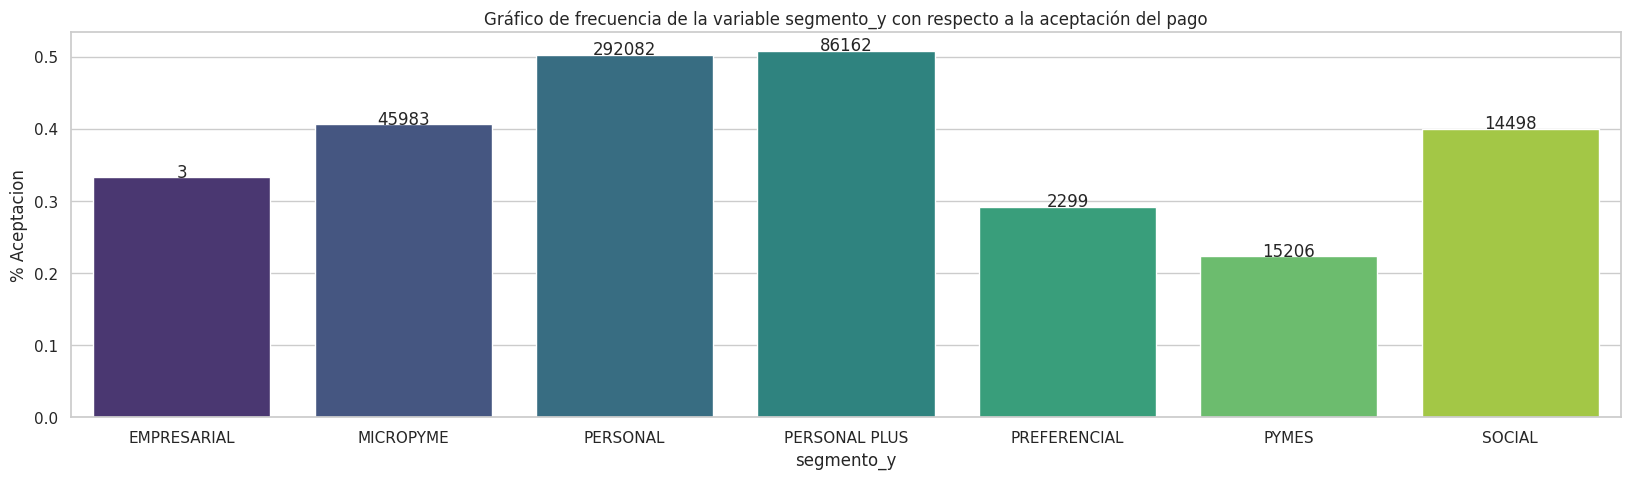

(None,
 y                   0       1   Total  % Aceptacion
 segmento_y                                         
 EMPRESARIAL         2       1       3      0.333333
 MICROPYME       27281   18702   45983      0.406716
 PERSONAL       145277  146805  292082      0.502616
 PERSONAL PLUS   42340   43822   86162      0.508600
 PREFERENCIAL     1628     671    2299      0.291866
 PYMES           11811    3395   15206      0.223267
 SOCIAL           8697    5801   14498      0.400124)

In [77]:
grafico_frecuencia('segmento_y')

In [78]:
test_value('segmento_y')

('p value:', np.float64(0.0))

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

In [80]:
data = df.drop('nit_num_oblig', axis=1)

### Análisis de correlación

In [81]:
def calcular_y_graficar_correlacion_cuantitativas(df, threshold=0.8):
    df_cuantitativas = df.select_dtypes(include=[np.number])
    correlacion = df_cuantitativas.corr()
    
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlacion, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, cbar=True, 
                annot_kws={"size": 8}, linewidths=0.5, linecolor='gray')
    plt.title('Matriz de Correlación de Variables Cuantitativas', fontsize=16)
    plt.show()
    
    correlacion_alta = correlacion[(correlacion.abs() > threshold) & (correlacion.abs() < 1)]
    
    correlaciones_significativas = correlacion_alta.stack().reset_index()
    correlaciones_significativas.columns = ['Variable 1', 'Variable 2', 'Correlación']
    correlaciones_significativas = correlaciones_significativas.sort_values(by='Correlación', ascending=False)
    
    return correlacion, correlaciones_significativas

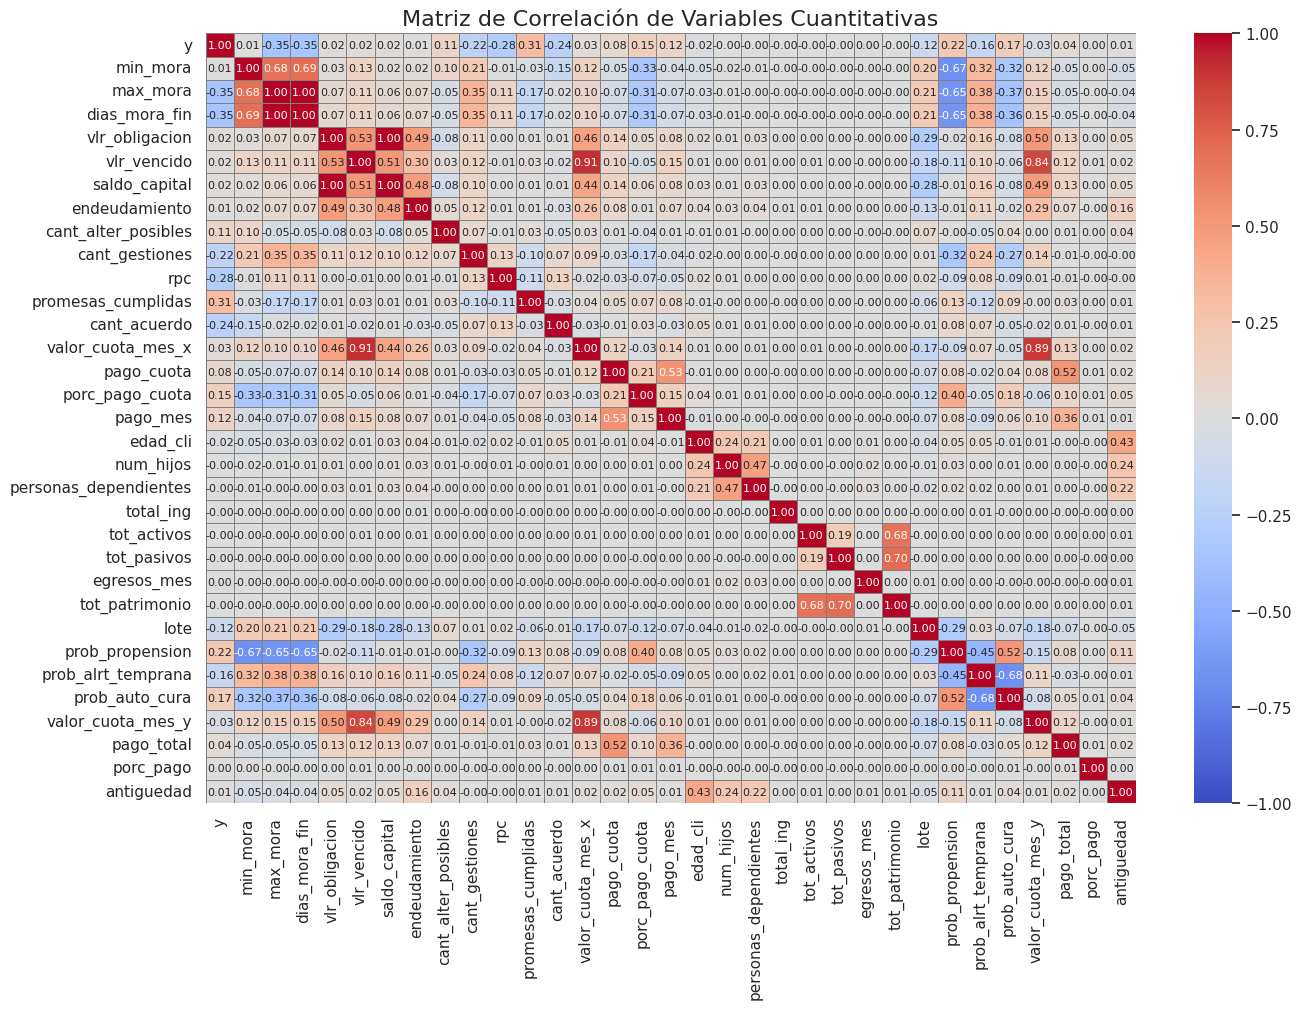


Correlaciones Significativas (> 0.8):
          Variable 1         Variable 2  Correlación
0           max_mora      dias_mora_fin     0.999101
1      dias_mora_fin           max_mora     0.999101
2     vlr_obligacion      saldo_capital     0.997118
5      saldo_capital     vlr_obligacion     0.997118
3        vlr_vencido  valor_cuota_mes_x     0.913371
6  valor_cuota_mes_x        vlr_vencido     0.913371
9  valor_cuota_mes_y  valor_cuota_mes_x     0.888584
7  valor_cuota_mes_x  valor_cuota_mes_y     0.888584
4        vlr_vencido  valor_cuota_mes_y     0.843634
8  valor_cuota_mes_y        vlr_vencido     0.843634


In [82]:
correlacion, correlaciones_significativas = calcular_y_graficar_correlacion_cuantitativas(data, threshold=0.8)

print("\nCorrelaciones Significativas (> 0.8):")
print(correlaciones_significativas)

Se logra evidenciar que existe una alta correlación (por encima del 80%) entre variables como max mora y dias mora, valor obigación y salgo capital, cuota mes y valor vencido, lo cual es lógico debido a la naturaleza de estas variables.

Se procede a eliminarlas para evitar problemas de multicolinealidad

In [83]:
variables_eliminar_correlacion = ['dias_mora_fin','saldo_capital','valor_cuota_mes_x','valor_cuota_mes_y','marca_pago_y','marca_pago_x','descripcion_ranking_post_ult']
data.drop(variables_eliminar_correlacion, axis=1, inplace=True)

## Ingeniería de carcaterísticas

### Selección variables más relevantes

Se usará el método SelectKBest para identificar aquellas variables más relevantes para el modelo de acuerdo a su nivel de significancia con respecto a la variable objetivo, este método tiene en cuenta la varianza explicada de cada una de las características

Se debe generar el conjunto de las variables independientes y la variable dependiente

In [84]:
import scipy.stats as stats

In [85]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(axis=0, inplace=True)

In [86]:
x = data.drop(['y', 'nit_num_oblig_id'],axis=1)
y = data['y']

In [87]:
x_dum = pd.get_dummies(x, drop_first=True)

In [88]:
selection = SelectKBest(score_func=f_classif,k='all')
selection.fit(x_dum, y)
selection

SelectKBest(k='all')

Feature 0: 54.914433
Feature 1: 64868.609498
Feature 2: 216.667672
Feature 3: 138.048588
Feature 4: 43.286459
Feature 5: 6038.043396
Feature 6: 22195.371725
Feature 7: 38095.744783
Feature 8: 48632.492793
Feature 9: 28015.538083
Feature 10: 2619.827864
Feature 11: 10405.651895
Feature 12: 6241.417605
Feature 13: 221.742587
Feature 14: 1.470942
Feature 15: 9.745615
Feature 16: 5.795216
Feature 17: 2.659383
Feature 18: 1.302903
Feature 19: 2.165929
Feature 20: 3.784913
Feature 21: 6620.952392
Feature 22: 23906.700985
Feature 23: 11228.316052
Feature 24: 13827.302000
Feature 25: 811.910069
Feature 26: 6.248975
Feature 27: 30.251166
Feature 28: 4186.784411
Feature 29: 0.256802
Feature 30: 1162.251794
Feature 31: 1162.251794
Feature 32: 1708.155240
Feature 33: 360.201455
Feature 34: 318.855679
Feature 35: 4186.784411
Feature 36: 601.211910
Feature 37: 474.738626
Feature 38: 72.751448
Feature 39: 36.310650
Feature 40: 34.741390
Feature 41: 0.921222
Feature 42: 97.600304
Feature 43: 9.341303


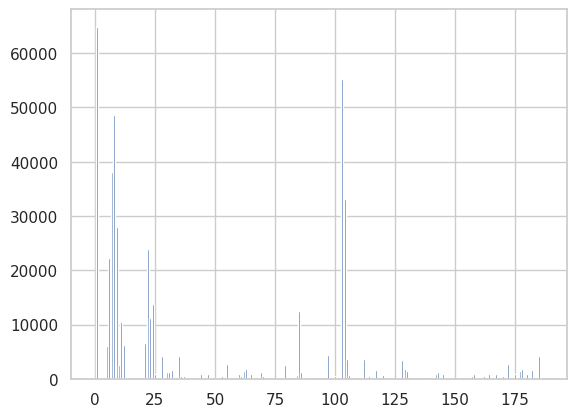

Text(0, 0.5, 'Variables')

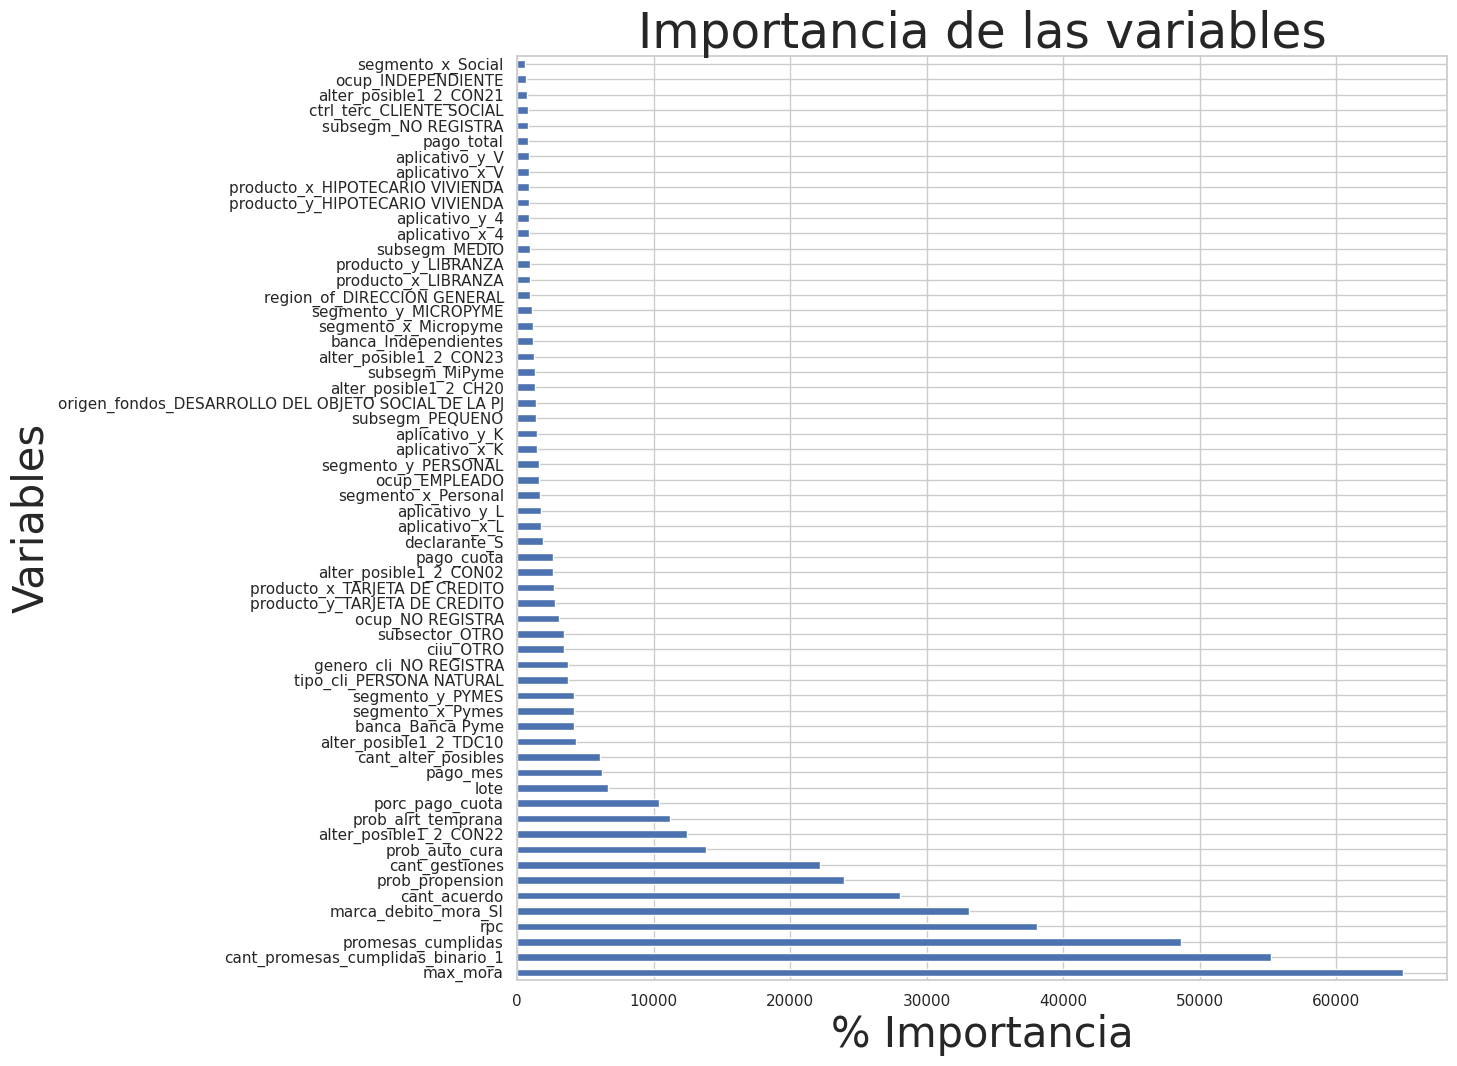

In [89]:
for i in range(len(selection.scores_)):
	print('Feature %d: %f' % (i, selection.scores_[i]))
plt.bar([i for i in range(len(selection.scores_))], selection.scores_)
plt.show()

plt.figure(figsize=(12,12),facecolor='w', edgecolor='k',num=1)
feat_importances = pd.Series(selection.scores_, index= x_dum.columns)
feat_importances.nlargest(60).plot(kind='barh')
parameters = {'axes.labelsize': 50,
          'axes.titlesize':50}
plt.rcParams.update(parameters)
plt.title('Importancia de las variables',fontsize=35)
plt.xlabel('% Importancia', fontsize=30)
plt.ylabel('Variables', fontsize=30)

Top 20 Mejores Variables:
                               Feature         Score
1                             max_mora  64868.609498
103  cant_promesas_cumplidas_binario_1  55239.756168
8                   promesas_cumplidas  48632.492793
7                                  rpc  38095.744783
104               marca_debito_mora_SI  33114.968211
9                         cant_acuerdo  28015.538083
22                     prob_propension  23906.700985
6                       cant_gestiones  22195.371725
24                      prob_auto_cura  13827.302000
85              alter_posible1_2_CON22  12457.667726
23                  prob_alrt_temprana  11228.316052
11                     porc_pago_cuota  10405.651895
21                                lote   6620.952392
12                            pago_mes   6241.417605
5                  cant_alter_posibles   6038.043396
97              alter_posible1_2_TDC10   4320.642247
28                    banca_Banca Pyme   4186.784411
35                  

<Figure size 1200x800 with 0 Axes>

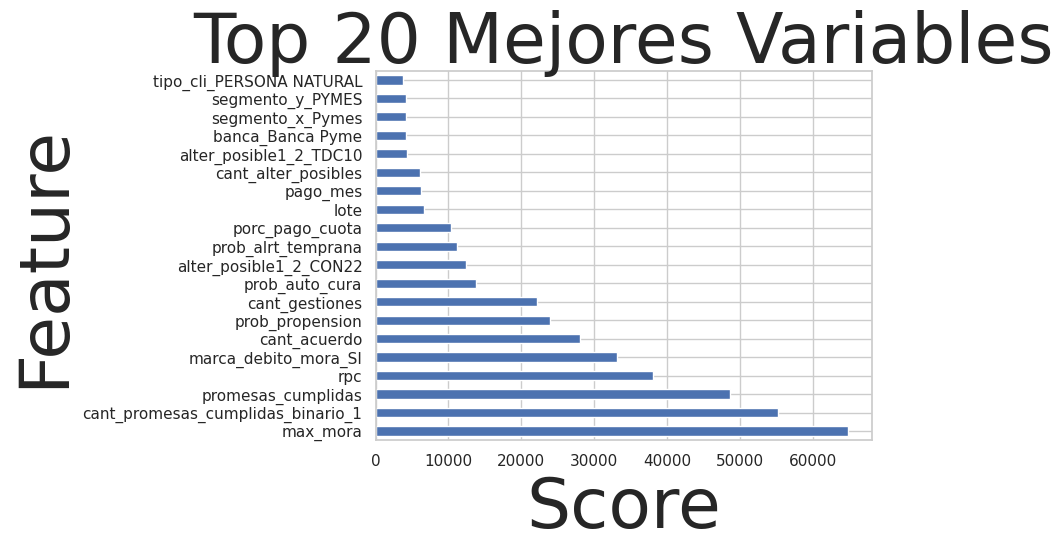

In [90]:
feature_scores = pd.DataFrame({
    'Feature': x_dum.columns,
    'Score': selection.scores_
})

top_20_best = feature_scores.nlargest(20, 'Score')

top_20_worst = feature_scores.nsmallest(20, 'Score')

print("Top 20 Mejores Variables:")
print(top_20_best)

plt.figure(figsize=(12, 8))
top_20_best.set_index('Feature').plot(kind='barh', legend=False)
plt.title('Top 20 Mejores Variables')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()


Top 20 Peores Variables:
                                        Feature     Score
74                        alter_posible1_2_CH27  0.009995
156                            region_of_CARIBE  0.046359
122                                   ocup_OTRA  0.057052
71                        alter_posible1_2_CH23  0.194923
29                               banca_Empresas  0.256802
115               ocup_DESEMPLEADO CON INGRESOS  0.263069
131  origen_fondos_DIVIDENDOS Y PARTICIPACIONES  0.269574
72                        alter_posible1_2_CH24  0.392064
50                      producto_x_MICROCREDITO  0.421094
124              ocup_PROFESIONAL INDEPENDIENTE  0.542387
41               producto_x_CREDITO HIPOTECARIO  0.921222
107                           ctrl_terc_CONYUGE  0.921222
132       origen_fondos_HONORARIOS Y COMISIONES  1.046450
76                        alter_posible1_2_CH29  1.085514
18                                  tot_pasivos  1.302903
57                         producto_x_TESORERI

<Figure size 1200x800 with 0 Axes>

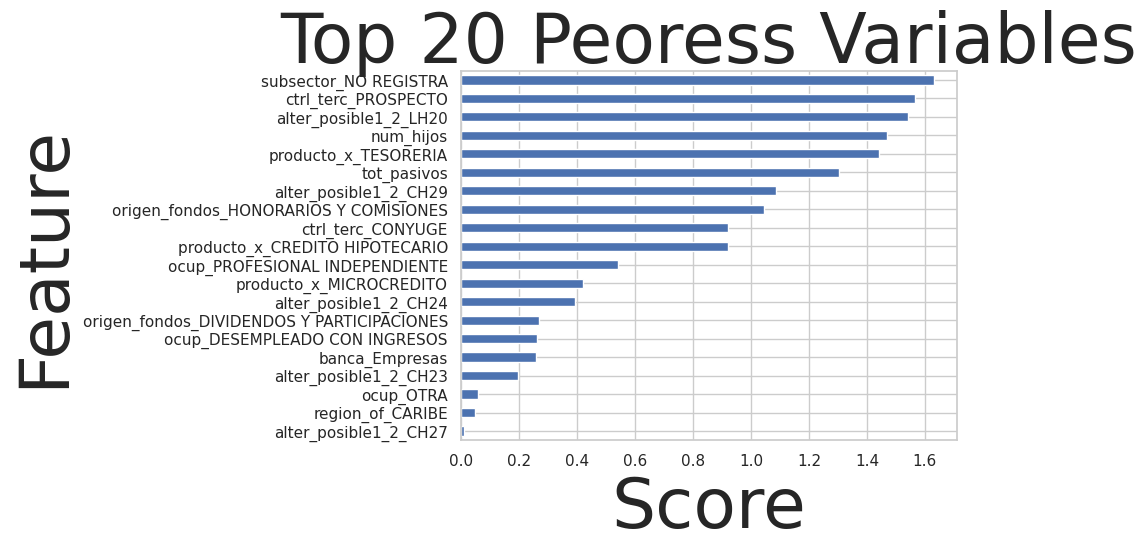

In [91]:
print("\nTop 20 Peores Variables:")
print(top_20_worst)

plt.figure(figsize=(12, 8))
top_20_worst.set_index('Feature').plot(kind='barh', legend=False)
plt.title('Top 20 Peoress Variables')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

Se procede a eliminar aquellas variables que no son representativas para el modelo

In [92]:
variables_depuradas = ['subsector', 'ctrl_terc','alter_posible1_2', 'producto_x', 'origen_fondos',
                       'ctrl_terc','ocup','banca','region_of']

In [93]:
df_dep = data.drop(variables_depuradas, axis=1)

In [94]:
df_dep.to_csv('dataset_to_train.csv')

In [95]:
df_dep.drop(['nit_num_oblig_id','y'], axis=1, inplace=True)

In [97]:
variables = df_dep.columns.to_list()
joblib.dump(variables, 'variables_seleccionadas.pkl')

['variables_seleccionadas.pkl']